# Notebook for Jacobsville sandstone Pmag analyses

SC1: Snake Creek pmag site. Fine to medium sandstone. Coherent and strong material but have relatively low magnetization. Commonly have NRMs of E-5 emu. The high temperature (>660 degree C components are not very well resolved in demagnetization). 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pmagpy.pmag as pmag
import pmagpy.ipmag as ipmag
import matplotlib
import matplotlib.colors as colors
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
from cartopy import config
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
Laurentia_outline = ShapelyFeature(Reader('../Data/Laurentia_shape/Laurentia.shp').geometries(),
                                ccrs.PlateCarree(), facecolor = 'none', edgecolor='black')

In [3]:
def angle_to_distance(angle):
    return angle/180*np.pi*6371

## Compile previous data from the Jacobsville Sandstone

### Dubois (1962) 

Du Bois, P. M. (1962). Palaeomagnetism and Correlation Fo Keweenawan Rocks. La Commission, Energie, mines et ressources Canada.

In [4]:
Dubois1962a_samples = pd.read_csv('../Data/Pmag_compiled/Dubois1962a_samples.txt', sep='\t', header = 1)
Dubois1962a_samples = ipmag.vgp_calc(Dubois1962a_samples,   tilt_correction='no',
    site_lon='lon',
    site_lat='lat',
    dec_is='dir_dec',
    inc_is='dir_inc',)
Dubois1962a_samples['Plon'] = Dubois1962a_samples['vgp_lon']
Dubois1962a_samples['Plat'] = Dubois1962a_samples['vgp_lat']
Dubois1962a_samples.head()

site            location  dir_dec  dir_inc  lat   lon  geologic_classes  \
0  CA1  Keweenaw Peninsula    260.5    -22.0   47 -88.5               NaN   
1   J1  Keweenaw Peninsula    219.5    -15.5   47 -88.5               NaN   
2   J4  Keweenaw Peninsula    239.5    -27.5   47 -88.5               NaN   
3   J5  Keweenaw Peninsula    219.5     43.0   47 -88.5               NaN   
4   J6  Keweenaw Peninsula    245.5    -32.0   47 -88.5               NaN   

   geologic_types  lithologies  method_codes  ...  result_type  dip_trend  \
0             NaN          NaN           NaN  ...          NaN        NaN   
1             NaN          NaN           NaN  ...          NaN        NaN   
2             NaN          NaN           NaN  ...          NaN        NaN   
3             NaN          NaN           NaN  ...          NaN        NaN   
4             NaN          NaN           NaN  ...          NaN        NaN   

   dip  paleolatitude    vgp_lat     vgp_lon  vgp_lat_rev  vgp_lon_rev  \
0  NaN     -11.420796 -14.782534  180.508784    14.782534     0.508784   
1  NaN      -7.894424 -38.441075  217.946992    38.441075    37.946992   
2  NaN     -14.589431 -31.278642  194.168393    31.278642    14.168393   
3  NaN      24.997641  -9.665423  235.711499     9.665423    55.711499   
4  NaN     -17.350615 -29.212765  187.161425    29.212765     7.161425   

         Plon       Plat  
0  180.508784 -14.782534  
1  217.946992 -38.441075  
2  194.168393 -31.278642  
3  235.711499  -9.665423  
4  187.161425 -29.212765  

[5 rows x 21 columns]

In [5]:
Dubois1962a_samples_kewee = Dubois1962a_samples[Dubois1962a_samples['location'] == 'Keweenaw Peninsula']
Dubois1962a_samples_Marie = Dubois1962a_samples[Dubois1962a_samples['location'] == 'Sault Ste. Marie']

Dubois1962a_samples_kewee_mean = ipmag.fisher_mean(Dubois1962a_samples_kewee['dir_dec'].tolist(),
                                                   Dubois1962a_samples_kewee['dir_inc'].tolist())
Dubois1962a_samples_Marie_mean = ipmag.fisher_mean(Dubois1962a_samples_Marie['dir_dec'].tolist(),
                                                   Dubois1962a_samples_Marie['dir_inc'].tolist())

Dubois1962a_samples_kewee_mean_pole = ipmag.fisher_mean(Dubois1962a_samples_kewee['vgp_lon'].tolist(),
                                                        Dubois1962a_samples_kewee['vgp_lat'].tolist())
Dubois1962a_samples_Marie_mean_pole = ipmag.fisher_mean(Dubois1962a_samples_Marie['vgp_lon'].tolist(),
                                                        Dubois1962a_samples_Marie['vgp_lat'].tolist())

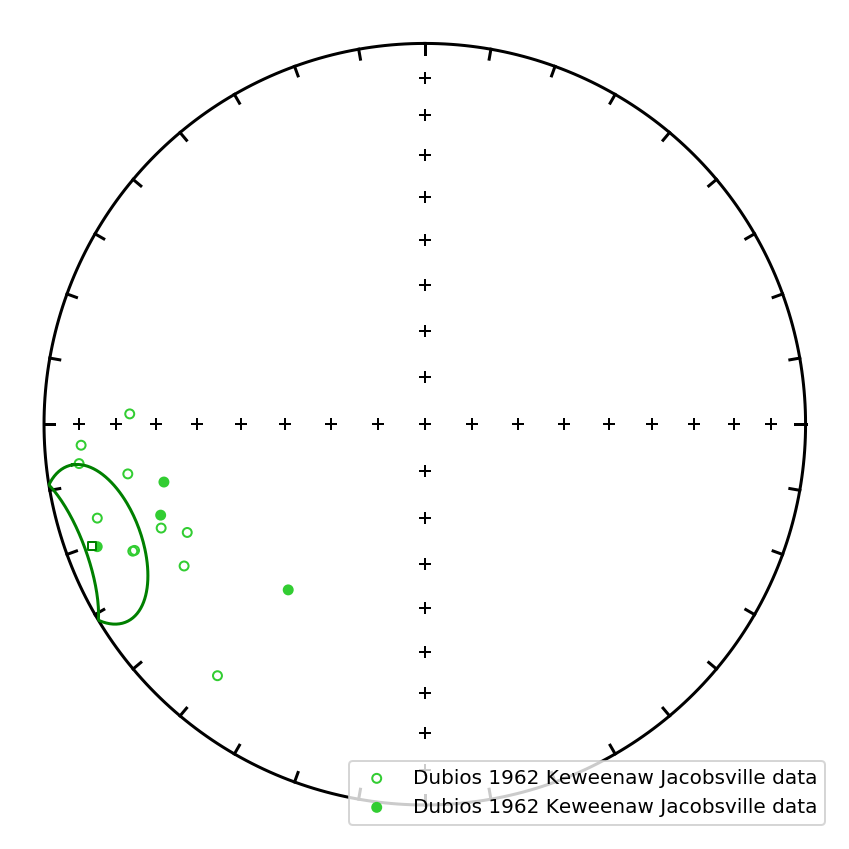

In [6]:
fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(fignum)

ipmag.plot_di(Dubois1962a_samples_kewee['dir_dec'].tolist(),Dubois1962a_samples_kewee['dir_inc'].tolist(),
              color='limegreen',label='Dubios 1962 Keweenaw Jacobsville data')
ipmag.plot_di_mean(Dubois1962a_samples_kewee_mean['dec'],Dubois1962a_samples_kewee_mean['inc'],Dubois1962a_samples_kewee_mean['alpha95'],
                   color='green', marker = 's')
plt.legend(loc=4)
plt.savefig('../Figures/Pmag/Dubois1962_Keweenaw_directions.pdf')
plt.show()

<Figure size 360x360 with 0 Axes>

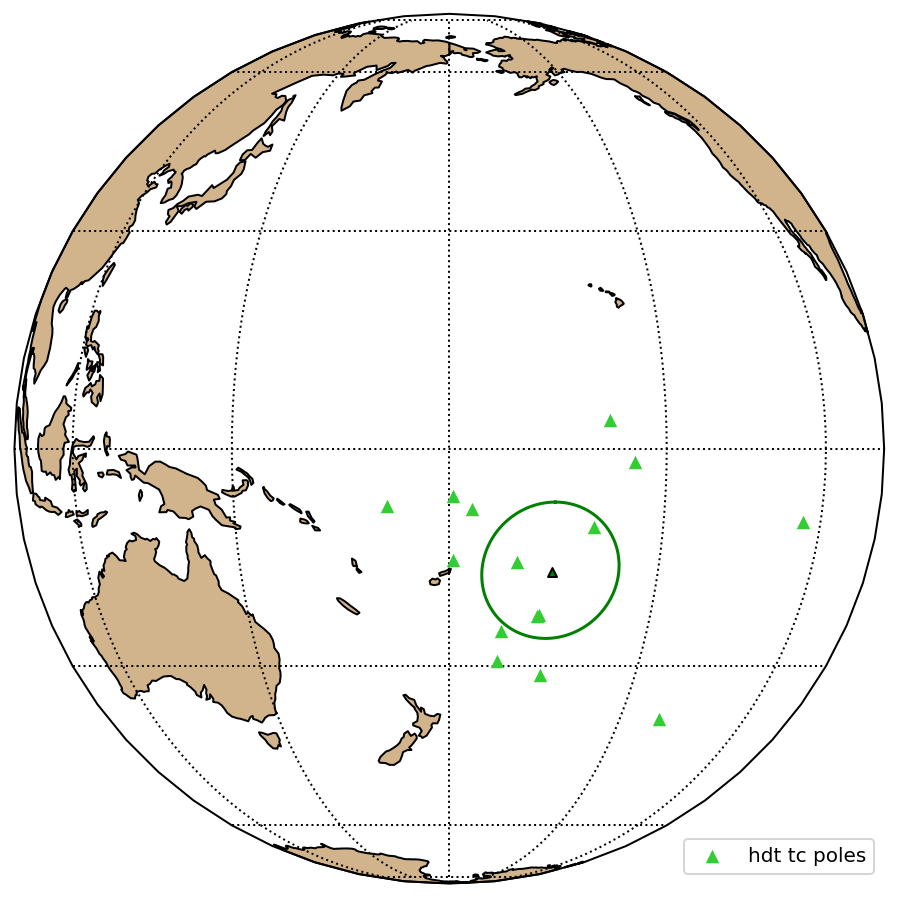

In [7]:
plt.figure(figsize=(5, 5))
map_axis=ipmag.make_orthographic_map(central_longitude=180,central_latitude=0)

ipmag.plot_vgp(map_axis, Dubois1962a_samples_kewee['vgp_lon'].tolist(), 
               Dubois1962a_samples_kewee['vgp_lat'].tolist(), markersize = 45, marker = '^', color = 'limegreen', edge='none', label = 'hdt tc poles')

ipmag.plot_pole(map_axis, Dubois1962a_samples_kewee_mean_pole['dec'], 
                Dubois1962a_samples_kewee_mean_pole['inc'], 
                Dubois1962a_samples_kewee_mean_pole['alpha95'], 
                color = 'green', marker = '^')

plt.legend(loc=4)
plt.savefig('../Figures/Pmag/Dubois1962_Keweenaw_poles.pdf')
plt.show()

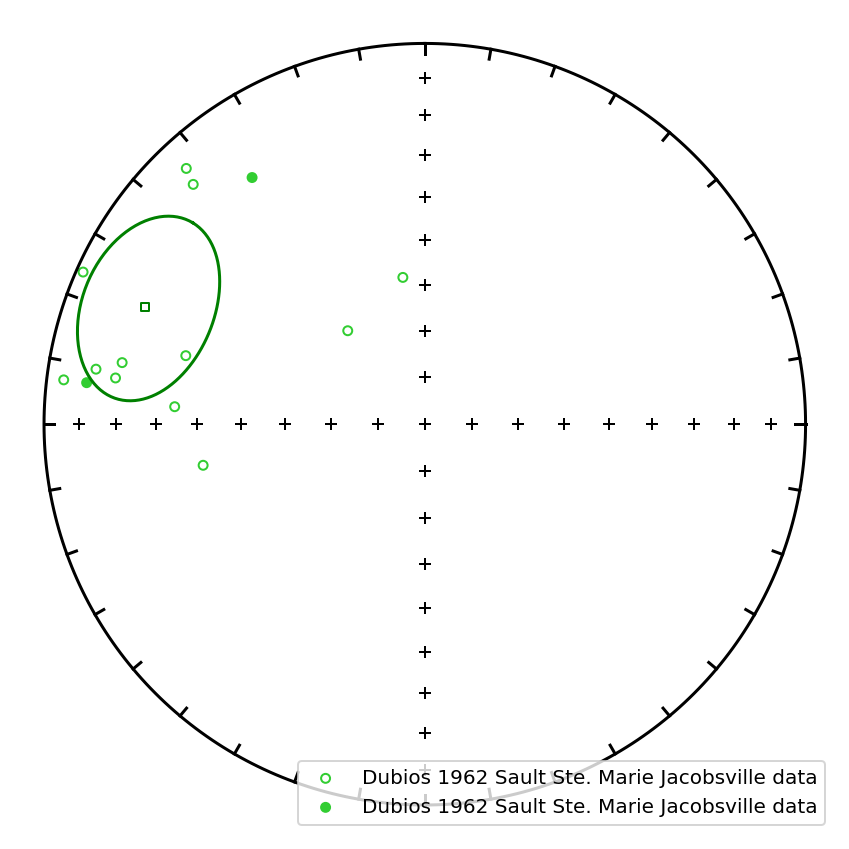

In [8]:
fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(fignum)

ipmag.plot_di(Dubois1962a_samples_Marie['dir_dec'].tolist(),Dubois1962a_samples_Marie['dir_inc'].tolist(),
              color='limegreen',label='Dubios 1962 Sault Ste. Marie Jacobsville data')
ipmag.plot_di_mean(Dubois1962a_samples_Marie_mean['dec'],Dubois1962a_samples_Marie_mean['inc'],Dubois1962a_samples_Marie_mean['alpha95'],
                   color='green', marker = 's')
plt.legend(loc=4)
plt.savefig('../Figures/Pmag/Dubois1962_SSM_directions.pdf')
plt.show()

<Figure size 360x360 with 0 Axes>

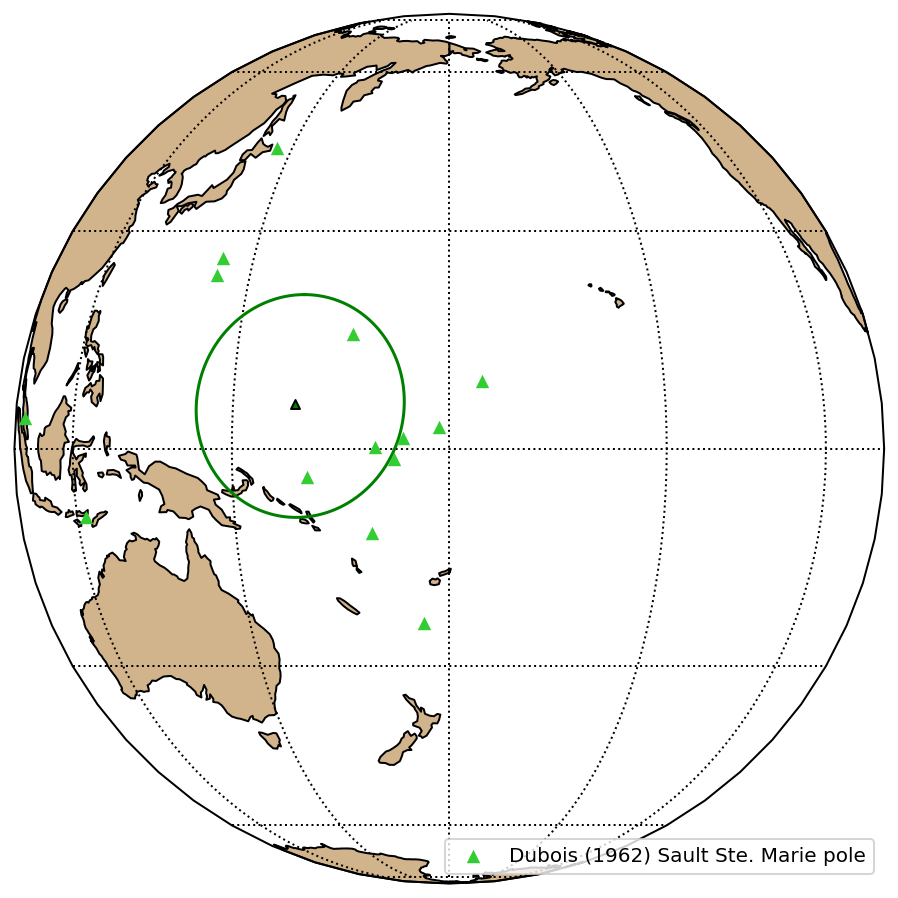

In [9]:
plt.figure(figsize=(5, 5))
map_axis=ipmag.make_orthographic_map(central_longitude=180,central_latitude=0)

ipmag.plot_vgp(map_axis, Dubois1962a_samples_Marie['vgp_lon'].tolist(), 
               Dubois1962a_samples_Marie['vgp_lat'].tolist(), markersize = 45, marker = '^', color = 'limegreen', edge='none', label = 'Dubois (1962) Sault Ste. Marie pole')

ipmag.plot_pole(map_axis, Dubois1962a_samples_Marie_mean_pole['dec'], 
                Dubois1962a_samples_Marie_mean_pole['inc'], 
                Dubois1962a_samples_Marie_mean_pole['alpha95'], 
                color = 'green', marker = '^')

plt.legend(loc=4)
plt.savefig('../Figures/Pmag/Dubois1962_Keweenaw_poles.pdf')
plt.show()

### Roy and Robertson (1978)

This study collected 257 specimens (37 sites - site here means one section) of the Jacobsville Sandstone from the Keweenaw Peninsula, Marquette area, and Sault ste. Marie area of Canada. Thermal demagnetization, AF, as well as chemical leaching methods were used to demagnetize the sandstone samples and it is interpreted that a total of three components exist in the sandstone. 

It is found that the Jacobsville Sandstone from Sault Ste. Marie area have a pole position in the northern hemisphere whereas the sandstone in the Keweenaw Peninsula and marquette regions are of southern hemisphere, with the Keweenaw pole being more southerly than the Marquette pole. Similar results were found by Duboise (1962), data shown above.

The demagnetization protocol was cleaning. Chemical leaching is often 6700 hours, thermal demag is at 675 degree C, AF demag at 290 mT. 

**A major question: what is the definition of site for Roy (1978)? In Table 1 they listed the "site mean results" but also note the stratigraphic separation between different sites are often within 1 m. It seems that they are treating a stratigraphic horizon as one site and collect samples/specimens within one horizon and group them into an individual site. This is different from what we do - we collect samples across horizons and group all samples collected within one exposed Jacobsville strat section as one site. **

Their J2 remanence is very similar to our lt component - low temperature overprint of present day local field direction. It is still interesting, however, that some of the carrier of this component might have a coercivity of 200 mT - indicating that some of the pigmentary hematite wad contributing to the overprint. It is also interesting that their J2 direction mean is similar to our lt mean direction - a bit more easterly than expected!

Their J1 remanence is a shallow direction remanence consistent with our hdt component result. Their cut off between this J1 component and J2 component is set to be 100 hours, 600 degree C, or 200 mT treatment. 

- Roy, J. L., & Robertson, W. A. (1978). Paleomagnetism of the Jacobsville Formation and the apparent polar path for the interval− 1100 to− 670 my for North America. Journal of Geophysical Research: Solid Earth, 83(B3), 1289-1304.

Only J1 directions are compiled.

In [10]:
Roy1978a_sites = pd.read_csv('../Data/Pmag_compiled/Roy1978a_sites.txt', sep='\t', header=1)
Roy1978a_sites = Roy1978a_sites.dropna(axis=0)
Roy1978a_sites = ipmag.vgp_calc(Roy1978a_sites,tilt_correction='no',
    site_lon='lon',
    site_lat='lat',
    dec_is='dir_dec',
    inc_is='dir_inc',)
Roy1978a_sites.head()

site           location Area  dir_dec  dir_inc  dir_k  dir_n_samples  \
0     1  Northern Michigan    A    249.0    -11.0   52.0              5   
1     2  Northern Michigan    A    238.0     -5.0   63.0              7   
2     3  Northern Michigan    A    244.0     -1.0   59.0              7   
3     4  Northern Michigan    A    252.0    -12.0  148.0              5   
4     5  Northern Michigan    A    269.0      3.0   15.0              6   

   dir_n_specimens  dir_n_total_specimens  dir_alpha95  ...   lon   Plon  \
0                5                      5         11.0  ... -88.2  193.0   
1                7                      7          8.0  ... -87.2  204.0   
2                7                      7          8.0  ... -86.2  261.0   
3                5                      5          6.0  ... -85.2  191.0   
4                6                      6         21.0  ... -84.2  186.0   

   Plat  grain_size sample_color paleolatitude    vgp_lat     vgp_lon  \
0 -18.0     unknown      unknown     -5.551151 -18.239057  193.742487   
1 -23.0     unknown      unknown     -2.504769 -23.025711  205.788819   
2 -18.0     unknown      unknown     -0.500038 -17.679252  203.184762   
3 -17.0     unknown      unknown     -6.066525 -16.622061  194.058103   
4  -2.0     unknown      unknown      1.501029   0.425113  187.552767   

   vgp_lat_rev  vgp_lon_rev  
0    18.239057    13.742487  
1    23.025711    25.788819  
2    17.679252    23.184762  
3    16.622061    14.058103  
4    -0.425113     7.552767  

[5 rows x 21 columns]

**calculated pole position using rough general site location shows inconsistent values for site 3 - the provided pole longitude is way too easterly than calculated. The value should be around 200, but the table in Roy and Robertson (1978) has 261E. In this compilation, we will exclude this site from Roy and Robertson (1978)**

In [11]:
Roy1978a_sites = Roy1978a_sites[Roy1978a_sites['site'] != 3]
Roy1978a_sites_normal = Roy1978a_sites[Roy1978a_sites['dir_dec'] > 180]
Roy1978a_sites_reversed = Roy1978a_sites[Roy1978a_sites['dir_dec'] < 180]

In [12]:
Roy1978a_sites_A = Roy1978a_sites[Roy1978a_sites['Area'] == 'A']
Roy1978a_sites_B = Roy1978a_sites[Roy1978a_sites['Area'] == 'B']
Roy1978a_sites_C = Roy1978a_sites[Roy1978a_sites['Area'] == 'C']

Roy1978a_sites_A_mean_pole = ipmag.fisher_mean(Roy1978a_sites_A['Plon'].tolist(),
                                                        Roy1978a_sites_A['Plat'].tolist())
Roy1978a_sites_B_mean_pole = ipmag.fisher_mean(Roy1978a_sites_B['Plon'].tolist(),
                                                        Roy1978a_sites_B['Plat'].tolist())
Roy1978a_sites_C_mean_pole = ipmag.fisher_mean(Roy1978a_sites_C['Plon'].tolist(),
                                                        Roy1978a_sites_C['Plat'].tolist())

In [13]:
Roy1978a_sites_mean = ipmag.fisher_mean(Roy1978a_sites['dir_dec'].tolist(), Roy1978a_sites['dir_inc'].tolist())

Roy1978a_sites_mean_pole = ipmag.fisher_mean(Roy1978a_sites['Plon'].tolist(),
                                                        Roy1978a_sites['Plat'].tolist())
ipmag.print_pole_mean(Roy1978a_sites_mean_pole)

Plon: 181.3  Plat: -5.3
Number of directions in mean (n): 29
Angular radius of 95% confidence (A_95): 5.1
Precision parameter (k) estimate: 28.8


#### all J1 directions and poles

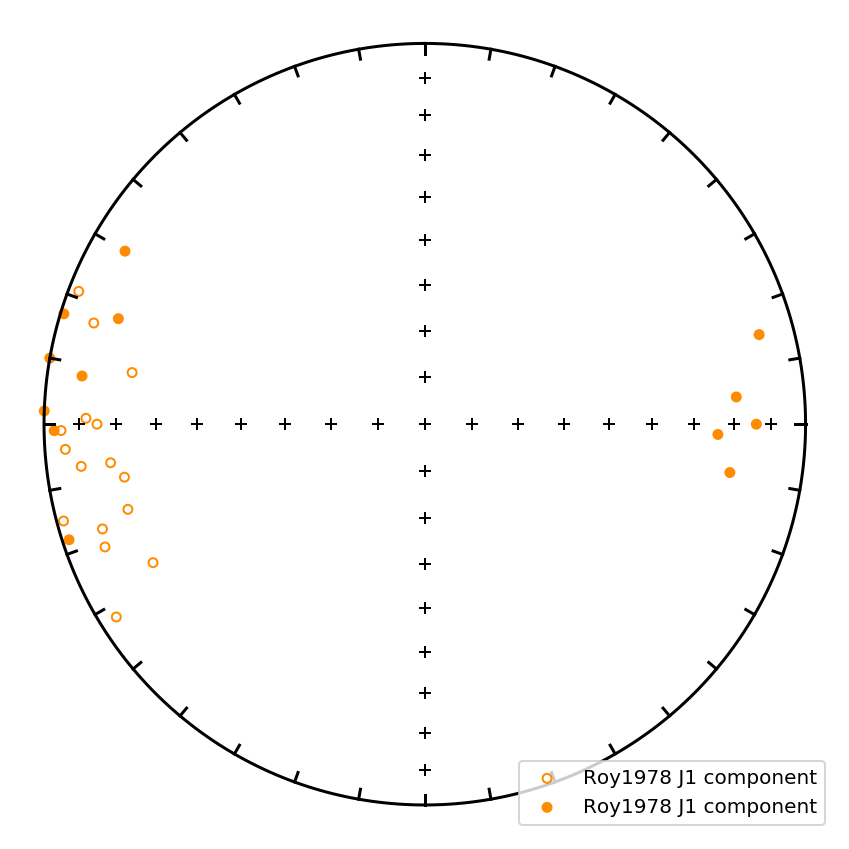

In [14]:
fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(fignum)

ipmag.plot_di(Roy1978a_sites['dir_dec'].tolist(),Roy1978a_sites['dir_inc'].tolist(),color='darkorange',label='Roy1978 J1 component')

# ipmag.plot_di_mean(Roy1978a_sites_mean['dec'],Roy1978a_sites_mean['inc'],Roy1978a_sites_mean['alpha95'],
#                    color='red', marker = 's')

plt.legend(loc=4)
plt.savefig('../Figures/Pmag/Roy1978_J1_directions.pdf')
plt.show()

<Figure size 360x360 with 0 Axes>

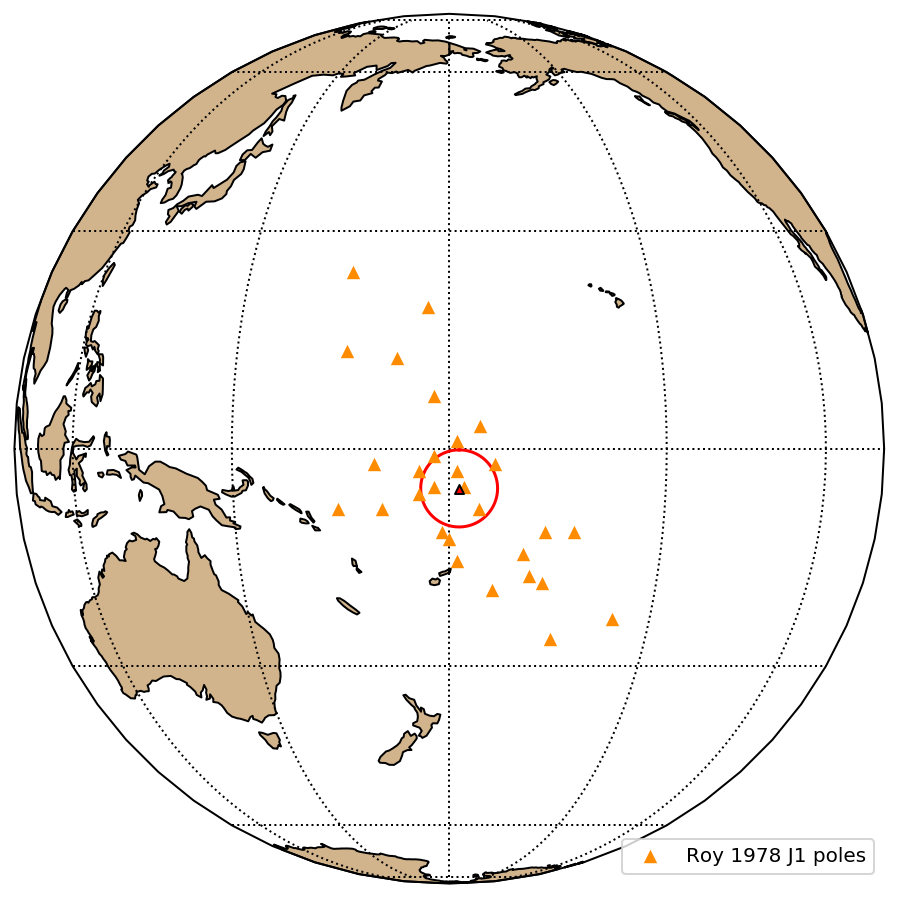

In [15]:
plt.figure(figsize=(5, 5))
map_axis=ipmag.make_orthographic_map(central_longitude=180,central_latitude=0)

ipmag.plot_vgp(map_axis, Roy1978a_sites['Plon'].tolist(), 
               Roy1978a_sites['Plat'].tolist(), 
               markersize = 45, 
               marker = '^', 
               color = 'darkorange', 
               edge='none', 
               label = 'Roy 1978 J1 poles')

ipmag.plot_pole(map_axis, Roy1978a_sites_mean_pole['dec'], 
                Roy1978a_sites_mean_pole['inc'], 
                Roy1978a_sites_mean_pole['alpha95'], 
                color = 'red', marker = '^')

plt.legend(loc=4)
plt.savefig('../Figures/Pmag/Roy1978_J1_poles.pdf')
plt.show()

#### J1 directions and poles by area

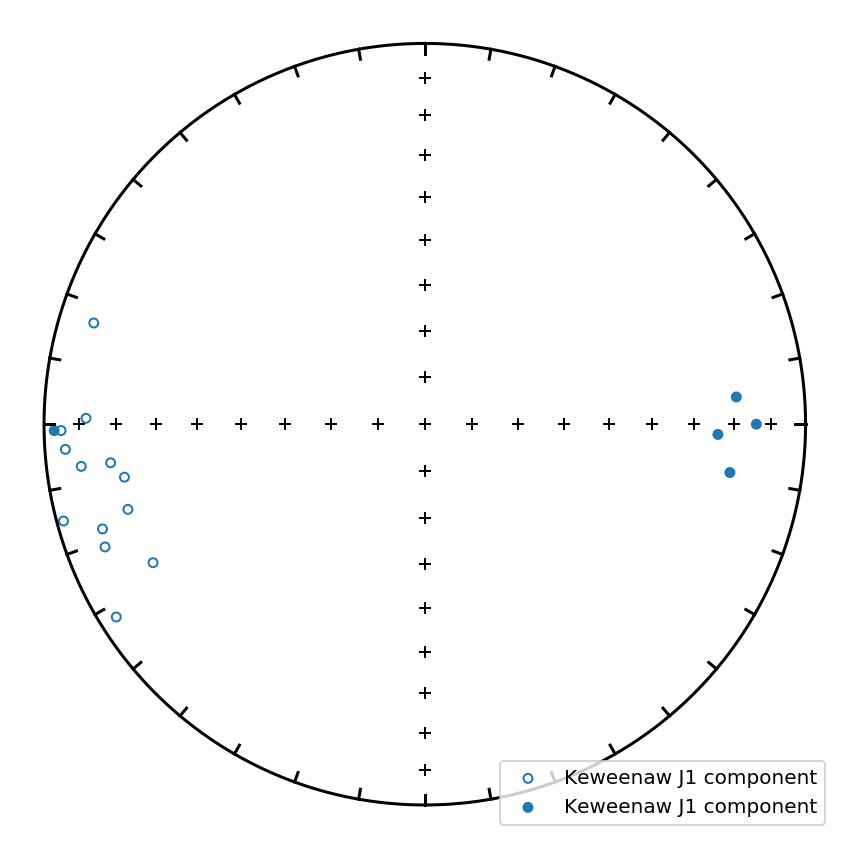

In [16]:
fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(fignum)

ipmag.plot_di(Roy1978a_sites_A['dir_dec'].tolist(),Roy1978a_sites_A['dir_inc'].tolist(),color='C0',label='Keweenaw J1 component')

# ipmag.plot_di_mean(Roy1978a_sites_mean['dec'],Roy1978a_sites_mean['inc'],Roy1978a_sites_mean['alpha95'],
#                    color='red', marker = 's')

plt.legend(loc=4)
plt.savefig('../Figures/Pmag/Roy1978_Keweenaw_directions.pdf')
plt.show()

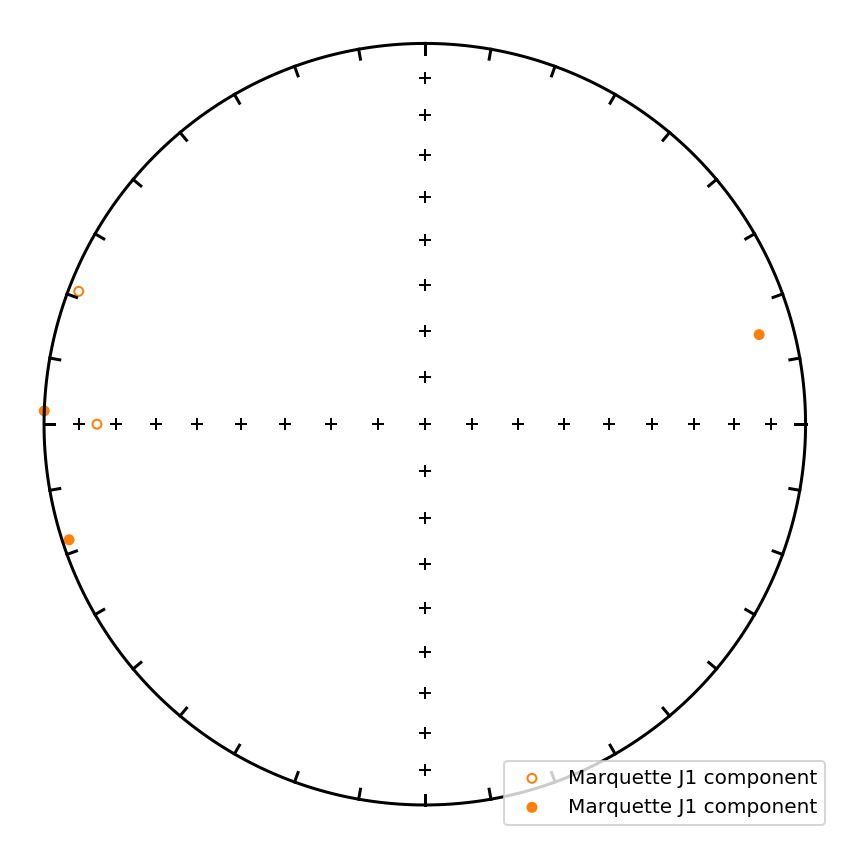

In [17]:
fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(fignum)

ipmag.plot_di(Roy1978a_sites_B['dir_dec'].tolist(),Roy1978a_sites_B['dir_inc'].tolist(),color='C1',label='Marquette J1 component')

# ipmag.plot_di_mean(Roy1978a_sites_mean['dec'],Roy1978a_sites_mean['inc'],Roy1978a_sites_mean['alpha95'],
#                    color='red', marker = 's')

plt.legend(loc=4)
plt.savefig('../Figures/Pmag/Roy1978_Marquette_directions.pdf')
plt.show()

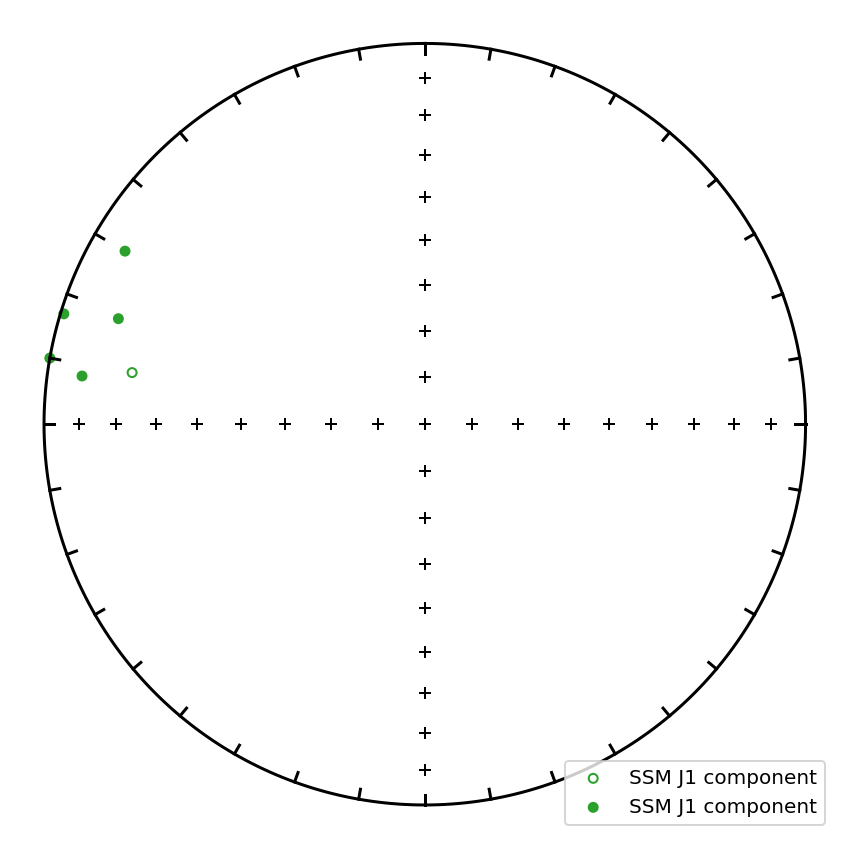

In [18]:
fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(fignum)

ipmag.plot_di(Roy1978a_sites_C['dir_dec'].tolist(),Roy1978a_sites_C['dir_inc'].tolist(),color='C2',label='SSM J1 component')

# ipmag.plot_di_mean(Roy1978a_sites_mean['dec'],Roy1978a_sites_mean['inc'],Roy1978a_sites_mean['alpha95'],
#                    color='red', marker = 's')

plt.legend(loc=4)
plt.savefig('../Figures/Pmag/Roy1978_SSM_directions.pdf')
plt.show()

<Figure size 360x360 with 0 Axes>

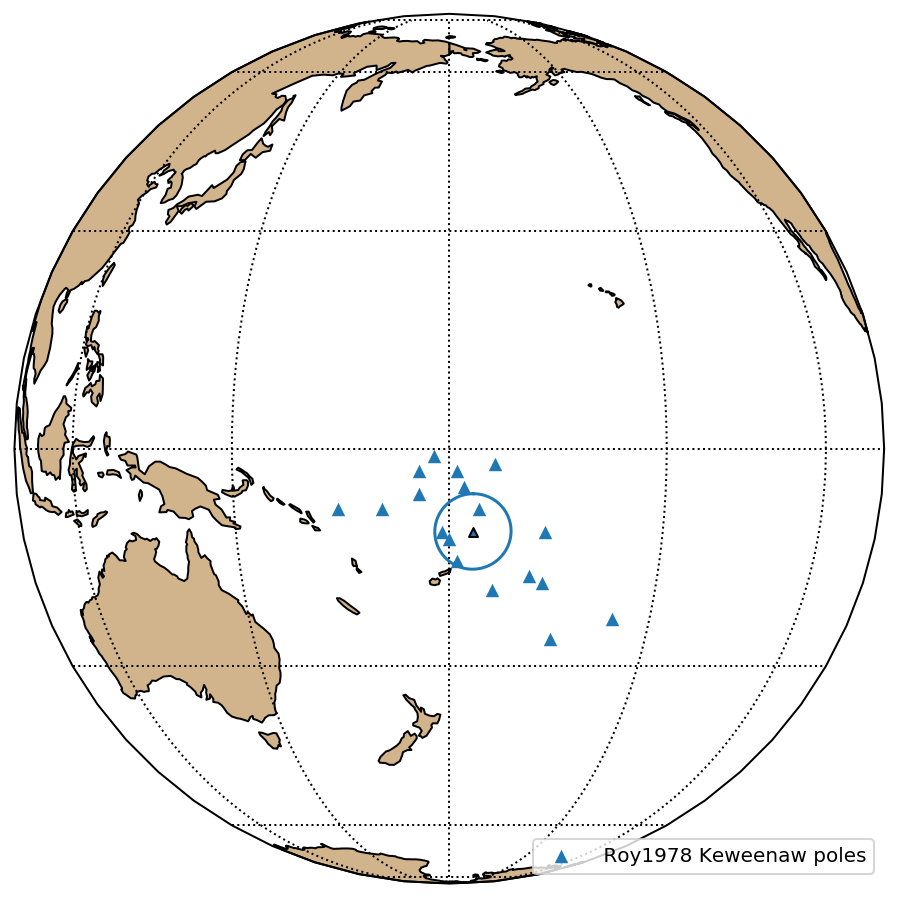

In [19]:
plt.figure(figsize=(5, 5))
map_axis=ipmag.make_orthographic_map(central_longitude=180,central_latitude=0)

ipmag.plot_vgp(map_axis, Roy1978a_sites_A['Plon'].tolist(), 
               Roy1978a_sites_A['Plat'].tolist(), 
               markersize = 45, 
               marker = '^',
               color = 'C0', 
               edge='none', 
               label = ' Roy1978 Keweenaw poles')

ipmag.plot_pole(map_axis, Roy1978a_sites_A_mean_pole['dec'], 
                Roy1978a_sites_A_mean_pole['inc'], 
                Roy1978a_sites_A_mean_pole['alpha95'], 
                color = 'C0', marker = '^')

plt.legend(loc=4)
plt.savefig('../Figures/Pmag/Roy1978_Keweenaw_poles.pdf')
plt.show()

<Figure size 360x360 with 0 Axes>

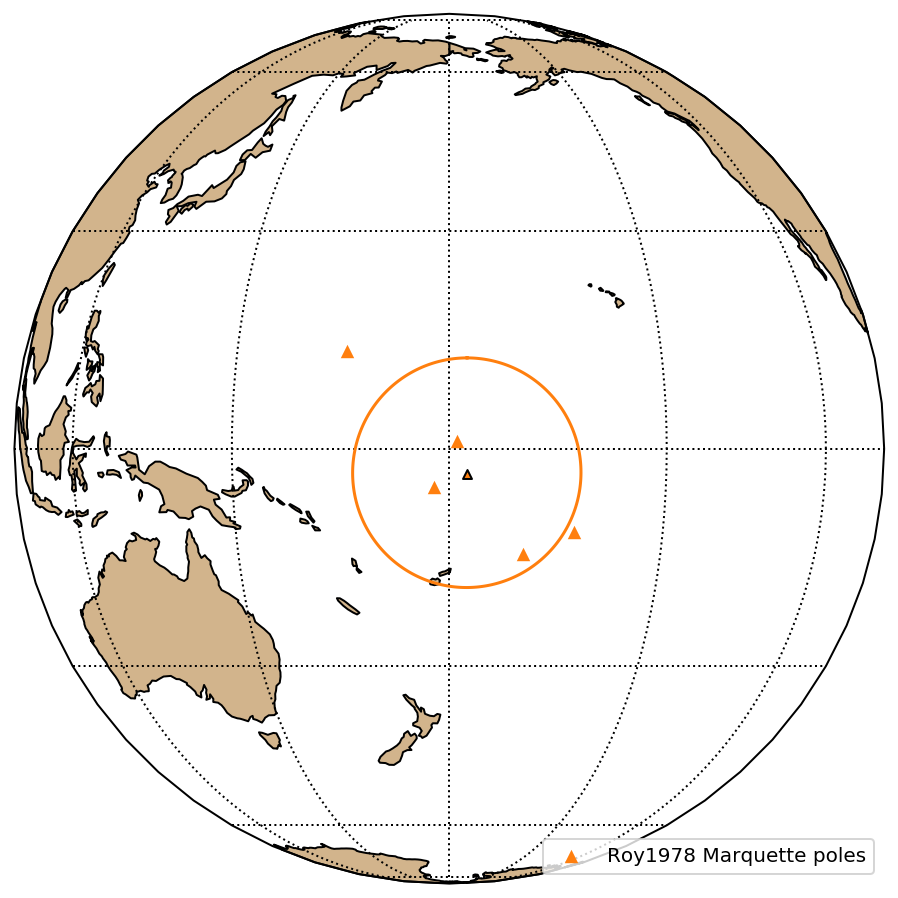

In [20]:
plt.figure(figsize=(5, 5))
map_axis=ipmag.make_orthographic_map(central_longitude=180,central_latitude=0)

ipmag.plot_vgp(map_axis, Roy1978a_sites_B['Plon'].tolist(), 
               Roy1978a_sites_B['Plat'].tolist(), 
               markersize = 45, 
               marker = '^', 
               color = 'C1', 
               edge='none', 
               label = 'Roy1978 Marquette poles')

ipmag.plot_pole(map_axis, Roy1978a_sites_B_mean_pole['dec'], 
                Roy1978a_sites_B_mean_pole['inc'], 
                Roy1978a_sites_B_mean_pole['alpha95'], 
                color = 'C1', marker = '^')

plt.legend(loc=4)
plt.savefig('../Figures/Pmag/Roy1978_Marquette_poles.pdf')
plt.show()

<Figure size 360x360 with 0 Axes>

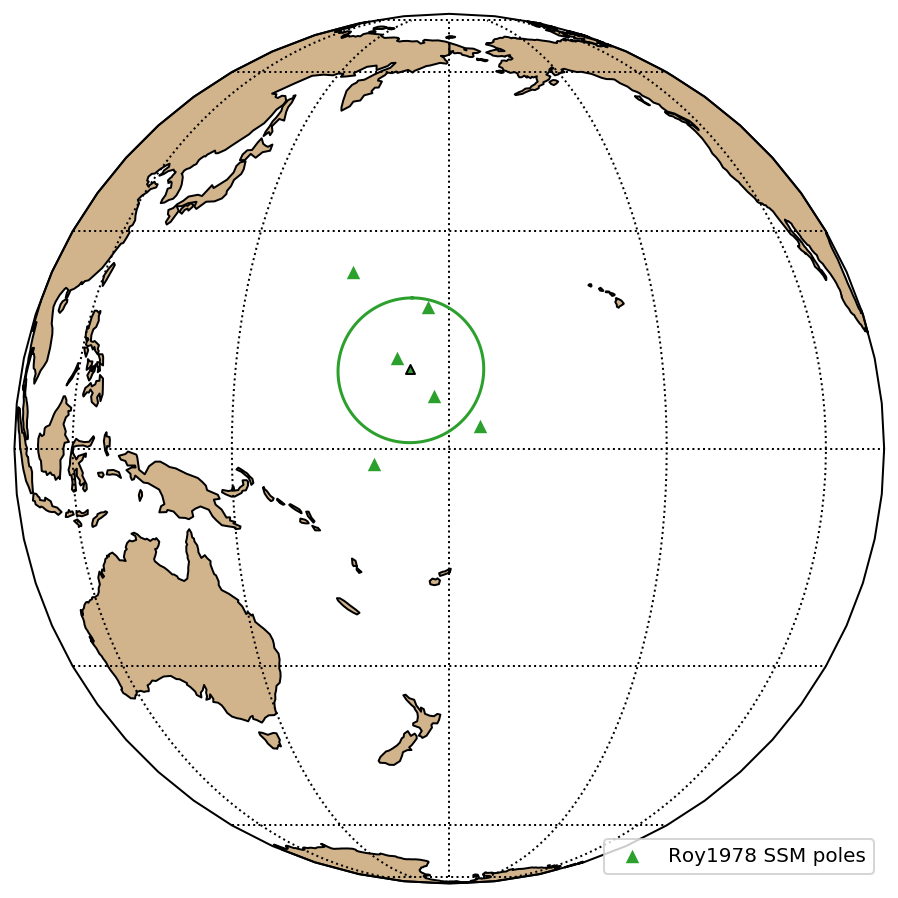

In [21]:
plt.figure(figsize=(5, 5))
map_axis=ipmag.make_orthographic_map(central_longitude=180,central_latitude=0)

ipmag.plot_vgp(map_axis, Roy1978a_sites_C['Plon'].tolist(), 
               Roy1978a_sites_C['Plat'].tolist(), 
               markersize = 45, 
               marker = '^', 
               color = 'C2', 
               edge='none', 
               label = 'Roy1978 SSM poles')

ipmag.plot_pole(map_axis, Roy1978a_sites_C_mean_pole['dec'], 
                Roy1978a_sites_C_mean_pole['inc'], 
                Roy1978a_sites_C_mean_pole['alpha95'], 
                color = 'C2', marker = '^')

plt.legend(loc=4)
plt.savefig('../Figures/Pmag/Roy1978_SSM_poles.pdf')
plt.show()

**There are two possible explanations for the discrepancy between the J1 component directions in Keweenaw area and the Sault Ste. Marie area: (1) the directions reflect the poles recorded in the lower and the upper portion of the Jacobsville - with the Sault Ste. Marie Jacobsville being older (ca. 1050 Ma), closer to the Nonesuch-Freda pole position. This can be supported by the fact that the mean pole of all sites from Roy (1978) overlaps with the Nonesuch pole position. And this is consistent with that the Keweenaw Peninsulaa Jacobsville is younger (near the top, ca. 995 Ma) of the stratigraphic section of the whoe Jacobsville sedimentary package. (2) the directions are in fact inaccurate and insufficient to draw that conclusion. When we divide the data by area, we do not see many "site" level data for the different areas in Roy (1978) and that we do not see enough siltstone facies being used. According to the description from that study, a lot of the material are of coarse or very coarse lithology, and the color of the samples used vary from red to grey - indicating a great variety in hematite abundance. Such variable lithologies of the pmag samples pose complexities to the pmag data interpretation. In addition, Roy (1978) did not discuss inclination shallowing problem - although inclination shallowing may not be significant, it is necessary to investigate the issue with sedimentary paleomagnetic directions, especially when associated with red beds.**

### Combine poles from Sault Ste. Marie area from Dubois (1962) and Roy and Robertson (1978)

In [22]:
Jacobsville_SSM = pd.concat([Roy1978a_sites_C, Dubois1962a_samples_Marie])
Jacobsville_SSM_mean_pole = ipmag.fisher_mean(Jacobsville_SSM['Plon'].tolist(), Jacobsville_SSM['Plat'].tolist())

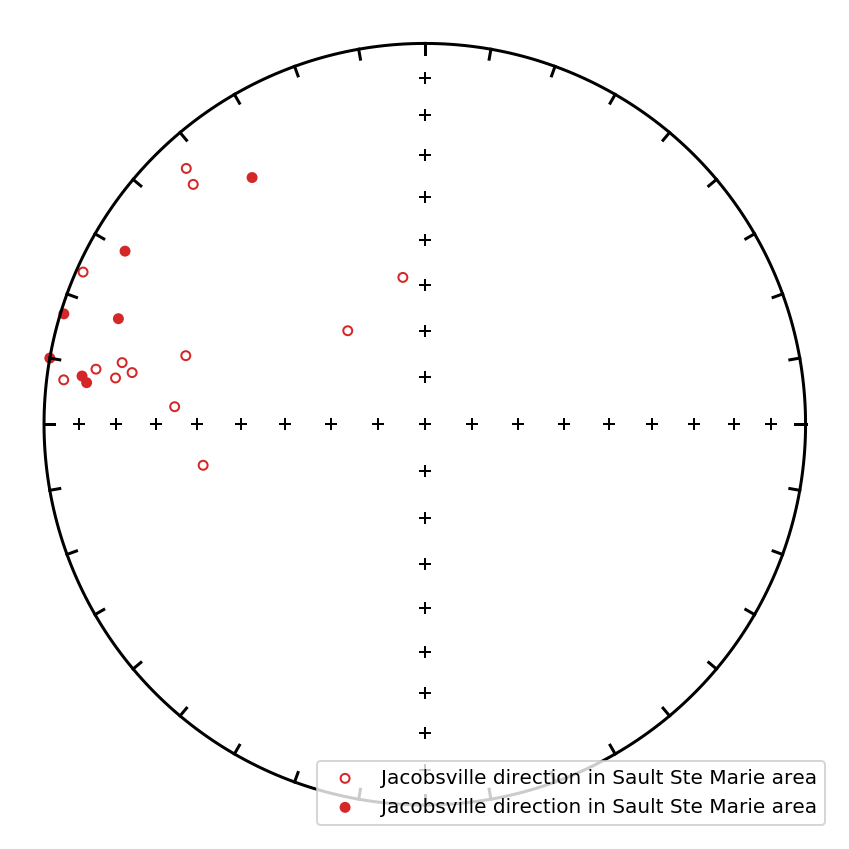

In [23]:
fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(fignum)

ipmag.plot_di(Jacobsville_SSM['dir_dec'].tolist(),Jacobsville_SSM['dir_inc'].tolist(),color='C3',label='Jacobsville direction in Sault Ste Marie area')

plt.legend(loc=4)
# plt.savefig('../Figures/specimen_directions.pdf')
plt.show()

<Figure size 360x360 with 0 Axes>

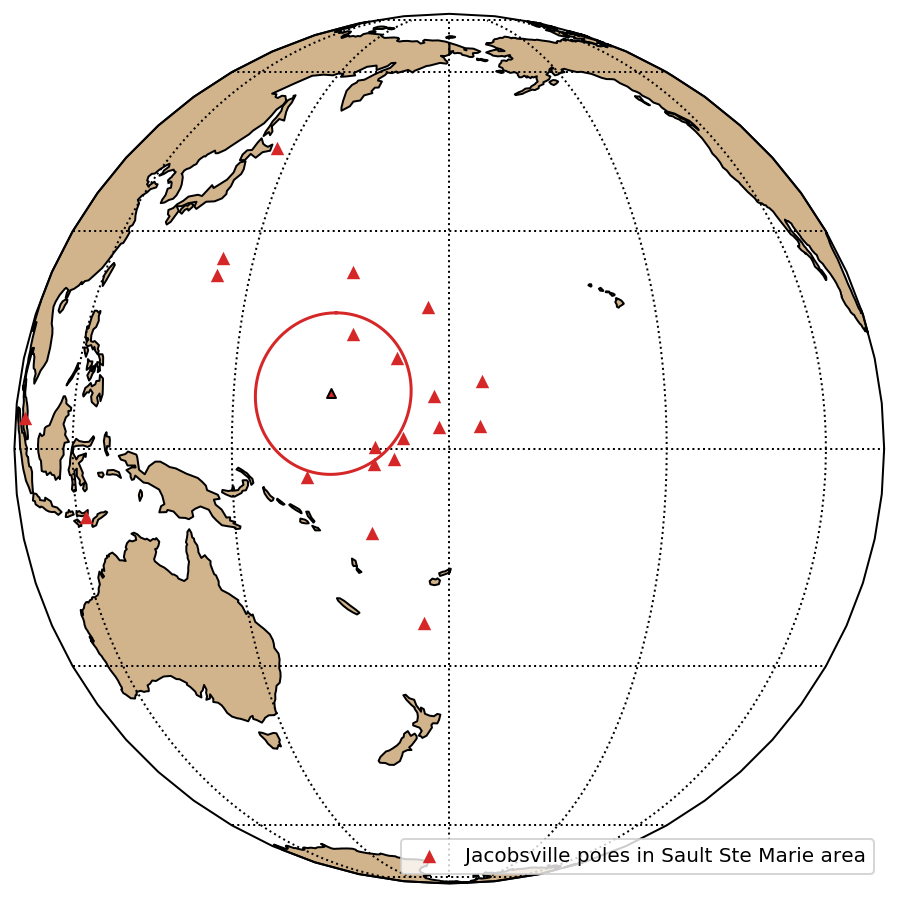

In [24]:
plt.figure(figsize=(5, 5))
map_axis=ipmag.make_orthographic_map(central_longitude=180,central_latitude=0)

ipmag.plot_vgp(map_axis, Jacobsville_SSM['Plon'].tolist(), 
               Jacobsville_SSM['Plat'].tolist(), markersize = 45, marker = '^', color = 'C3', edge='none', label = 'Jacobsville poles in Sault Ste Marie area')

ipmag.plot_pole(map_axis, Jacobsville_SSM_mean_pole['dec'], 
                Jacobsville_SSM_mean_pole['inc'], 
                Jacobsville_SSM_mean_pole['alpha95'], 
                color = 'C3', marker = '^')

plt.legend(loc=4)
plt.show()

## New pmag data from this study

In [25]:
Jacobsville_data = pd.read_csv('../Data/Pmag_new/specimens.txt', sep='\t', header=1)
Jacobsville_data['vgp_lon'] = pmag.dia_vgp(Jacobsville_data['dir_dec'], Jacobsville_data['dir_inc'], 0, 47.3, -88.2)[0]
Jacobsville_data['vgp_lat'] = pmag.dia_vgp(Jacobsville_data['dir_dec'], Jacobsville_data['dir_inc'], 0, 47.3, -88.2)[1]
Jacobsville_data['vgp_lon_rev'] = Jacobsville_data['vgp_lon'] + 180
Jacobsville_data['vgp_lat_rev'] = -Jacobsville_data['vgp_lat']

Jacobsville_data['Plon'] = Jacobsville_data['vgp_lon']
Jacobsville_data['Plat'] = Jacobsville_data['vgp_lat']

AF1_spec_data = Jacobsville_data[Jacobsville_data['specimen'].str.contains('AF1')]
SC1_spec_data = Jacobsville_data[Jacobsville_data['specimen'].str.contains('SC')]
JK_spec_data = Jacobsville_data[Jacobsville_data['specimen'].str.contains('JK')]
JK2_spec_data = Jacobsville_data[Jacobsville_data['specimen'].str.contains('JK2')]
JK3_spec_data = Jacobsville_data[Jacobsville_data['specimen'].str.contains('JK3')]
NW1_spec_data = Jacobsville_data[Jacobsville_data['specimen'].str.contains('NW1')]
NW2_spec_data = Jacobsville_data[Jacobsville_data['specimen'].str.contains('NW2')]

- lt component: low temperature component of the fit, using geographic coordinates
- mt component: mid temperture component, compare geographic and tilt corrected coordinates
- hdt component: high temperature component, compare geographic and tilt corrected coordinates

In [26]:
AF1_spec_lt = AF1_spec_data[(AF1_spec_data['dir_comp'] == 'lt') & (AF1_spec_data['dir_tilt_correction'] == 0)]
AF1_spec_hdt_gc = AF1_spec_data[(AF1_spec_data['dir_comp'] == 'hdt') & (AF1_spec_data['dir_tilt_correction'] == 0)]
AF1_spec_hdt_tc = AF1_spec_data[(AF1_spec_data['dir_comp'] == 'hdt') & (AF1_spec_data['dir_tilt_correction'] == 100)]

SC1_spec_lt = SC1_spec_data[(SC1_spec_data['dir_comp'] == 'lt') & (SC1_spec_data['dir_tilt_correction'] == 0)]
SC1_spec_hdt_gc = SC1_spec_data[(SC1_spec_data['dir_comp'] == 'hdt') & (SC1_spec_data['dir_tilt_correction'] == 0)]
SC1_spec_hdt_tc = SC1_spec_data[(SC1_spec_data['dir_comp'] == 'hdt') & (SC1_spec_data['dir_tilt_correction'] == 100)]

JK_spec_lt = JK_spec_data[(JK_spec_data['dir_comp'] == 'lt') & (JK_spec_data['dir_tilt_correction'] == 0)]
JK_spec_hdt_gc = JK_spec_data[(JK_spec_data['dir_comp'] == 'hdt') & (JK_spec_data['dir_tilt_correction'] == 0)]
JK_spec_hdt_tc = JK_spec_data[(JK_spec_data['dir_comp'] == 'hdt') & (JK_spec_data['dir_tilt_correction'] == 100)]

JK2_spec_lt = JK2_spec_data[(JK2_spec_data['dir_comp'] == 'lt') & (JK2_spec_data['dir_tilt_correction'] == 0)]
JK2_spec_hdt_gc = JK2_spec_data[(JK2_spec_data['dir_comp'] == 'hdt') & (JK2_spec_data['dir_tilt_correction'] == 0)]
JK2_spec_hdt_tc = JK2_spec_data[(JK2_spec_data['dir_comp'] == 'hdt') & (JK2_spec_data['dir_tilt_correction'] == 100)]

JK3_spec_lt = JK3_spec_data[(JK3_spec_data['dir_comp'] == 'lt') & (JK3_spec_data['dir_tilt_correction'] == 0)]
JK3_spec_hdt_gc = JK3_spec_data[(JK3_spec_data['dir_comp'] == 'hdt') & (JK3_spec_data['dir_tilt_correction'] == 0)]
JK3_spec_hdt_tc = JK3_spec_data[(JK3_spec_data['dir_comp'] == 'hdt') & (JK3_spec_data['dir_tilt_correction'] == 100)]

NW1_spec_lt = NW1_spec_data[(NW1_spec_data['dir_comp'] == 'lt') & (NW1_spec_data['dir_tilt_correction'] == 0)]
NW1_spec_hdt_gc = NW1_spec_data[(NW1_spec_data['dir_comp'] == 'hdt') & (NW1_spec_data['dir_tilt_correction'] == 0)]
NW1_spec_hdt_tc = NW1_spec_data[(NW1_spec_data['dir_comp'] == 'hdt') & (NW1_spec_data['dir_tilt_correction'] == 100)]

NW2_spec_lt = NW2_spec_data[(NW2_spec_data['dir_comp'] == 'lt') & (NW2_spec_data['dir_tilt_correction'] == 0)]
NW2_spec_hdt_gc = NW2_spec_data[(NW2_spec_data['dir_comp'] == 'hdt') & (NW2_spec_data['dir_tilt_correction'] == 0)]
NW2_spec_hdt_tc = NW2_spec_data[(NW2_spec_data['dir_comp'] == 'hdt') & (NW2_spec_data['dir_tilt_correction'] == 100)]

### pmag tilt correction table

| site | samples           | dip  | dip_trend | N  |
|------|-------------------|------|-----------|----|
| NW1  | 1,2,7,8,9         | 112  | 97        | 5  |
| NW1  | 3,4,5,6           | 121  | 96        | 10 |
| NW1  | 10,11,12,13,14,15 | 83.2 | 291.3     | 11 |
| NW2  | all               | 2    | 204       | 4  |
| SC1  | 1 to 5            | 95   | 160       | 1  |
| SC1  | 6 to 11           | 93   | 164       | 8  |
| SC1  | 12 to 31          | 81   | 157       | 9  |
| SC1  | 32 to 41          | 39   | 160       | 8  |
| SC1  | 42 to 56          | 3    | 178       | 11 |
| SC1  | 57 to 61          | 93   | 164       | 8  |
| SC1  | 62 to 65          | 4    | 85        | 8  |
| SC1  | 66 to 67          | 4    | 120       | 4  |
| SC1  | 68 to 73          | 4    | 135       | 6  |
| SC1  | 74 to 75          | 7    | 151       | 6  |
| AF1  | all               | 1    | 322       | 15 |
| JK2  | all               | 9    | 75        | 1  |
| JK3  | 1 to 5            | 17   | 288       | 4  |
| JK3  | 6,7               | 10.5 | 265       | 2  |
| JK3  | 8                 | 10   | 292       | 4  |

- site: site name
- samples: core samples within a particular site
- dip: average dip of the bedding plane
- dip_trend: average dip trend or dip direction of the bedding plane 
- N: number of averaged measurements

### section AF1 pmag results

This section at Agate Falls has dual polarities and it likely captured a transitional field with specimen 16a and 17a. We interpret these two specimens to have captured a transitional field because 17a which is stratigraphically higher than (about 60 cm) the specimen 16a has similar normal direction but is closer to the reversed polarity directions, which are captured by specimens 18 to 24. 

For the pmag pole compilation, we will not use directions from 16a and 17a, and split the normal and reversed polarities. 

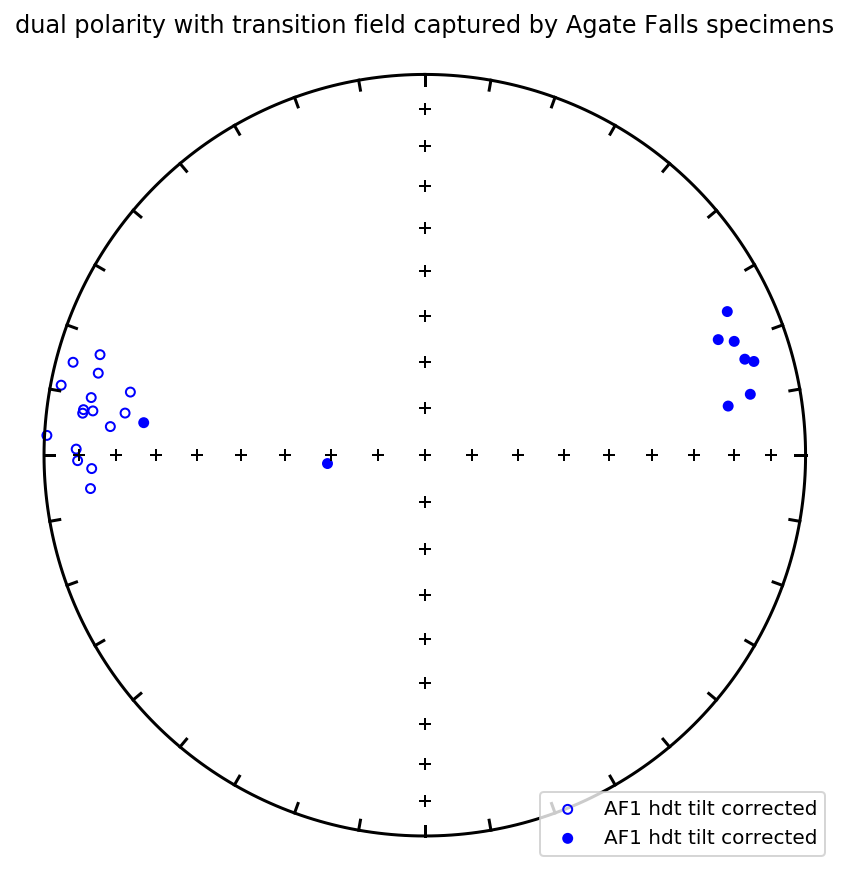

In [27]:
fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(fignum)
ipmag.plot_di(AF1_spec_hdt_tc['dir_dec'].tolist(),AF1_spec_hdt_tc['dir_inc'].tolist(),color='blue',label='AF1 hdt tilt corrected')

plt.legend(loc=4)
plt.title('dual polarity with transition field captured by Agate Falls specimens')
plt.show()

In [28]:
AF1_spec_hdt_tc = AF1_spec_hdt_tc[~AF1_spec_hdt_tc['specimen'].str.contains('16a|17a')]
AF1_spec_hdt_tc_N = AF1_spec_hdt_tc[AF1_spec_hdt_tc['dir_inc'] < 0]
AF1_spec_hdt_tc_R = AF1_spec_hdt_tc[AF1_spec_hdt_tc['dir_inc'] > 0]
AF1_spec_hdt_tc_N_mean = ipmag.fisher_mean(AF1_spec_hdt_tc_N['dir_dec'].tolist(), AF1_spec_hdt_tc_N['dir_inc'].tolist())
AF1_spec_hdt_tc_R_mean = ipmag.fisher_mean(AF1_spec_hdt_tc_R['dir_dec'].tolist(), AF1_spec_hdt_tc_R['dir_inc'].tolist())

In [29]:
AF1_spec_hdt_tc_N_mean_pole = ipmag.fisher_mean(AF1_spec_hdt_tc_N['vgp_lon'].tolist(), AF1_spec_hdt_tc_N['vgp_lat'].tolist())
AF1_spec_hdt_tc_R_mean_pole = ipmag.fisher_mean(AF1_spec_hdt_tc_R['vgp_lon_rev'].tolist(), AF1_spec_hdt_tc_R['vgp_lat_rev'].tolist())

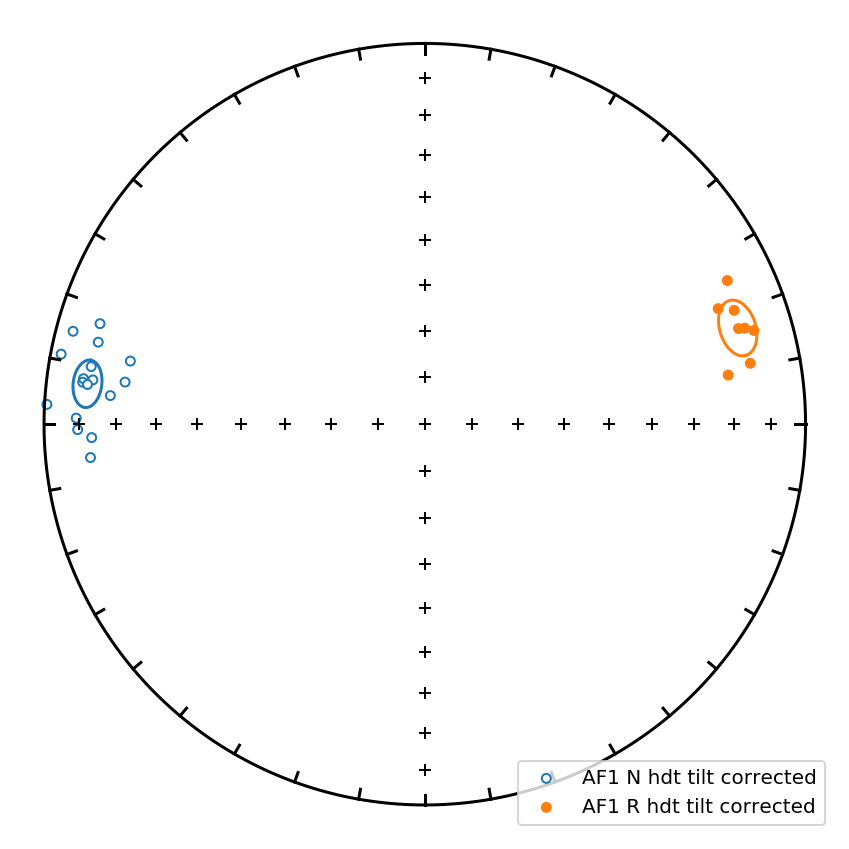

In [30]:
fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(fignum)
ipmag.plot_di(AF1_spec_hdt_tc_N['dir_dec'].tolist(),AF1_spec_hdt_tc_N['dir_inc'].tolist(),color='C0',label='AF1 N hdt tilt corrected')
ipmag.plot_di(AF1_spec_hdt_tc_R['dir_dec'].tolist(),AF1_spec_hdt_tc_R['dir_inc'].tolist(),color='C1',label='AF1 R hdt tilt corrected')
ipmag.plot_di_mean(AF1_spec_hdt_tc_N_mean['dec'], AF1_spec_hdt_tc_N_mean['inc'], AF1_spec_hdt_tc_N_mean['alpha95'], color = 'C0')
ipmag.plot_di_mean(AF1_spec_hdt_tc_R_mean['dec'], AF1_spec_hdt_tc_R_mean['inc'], AF1_spec_hdt_tc_R_mean['alpha95'], color = 'C1')


plt.legend(loc=4)
# plt.title('dual polarity without transition field captured by Agate Falls specimens')
plt.savefig('../Figures/Pmag/AF1_directions.pdf')
plt.show()

#### AF1 VGPs

<Figure size 360x360 with 0 Axes>

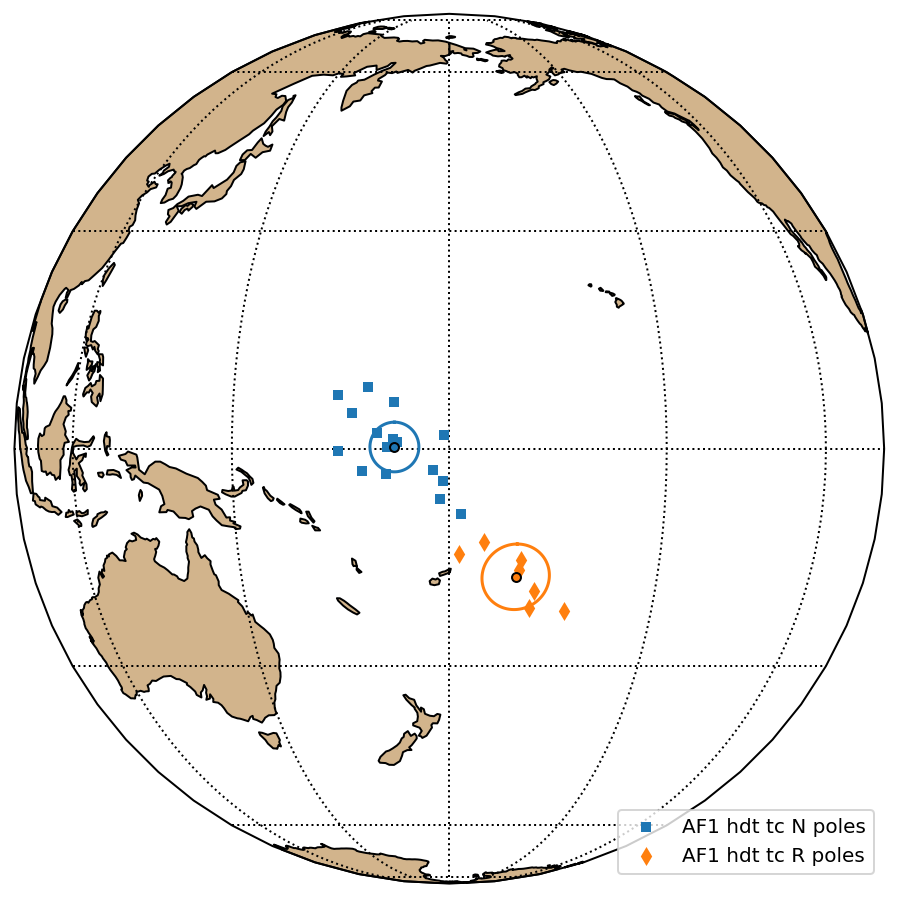

In [31]:
plt.figure(figsize=(5, 5))
map_axis=ipmag.make_orthographic_map(central_longitude=180,central_latitude=0)

ipmag.plot_vgp(map_axis, AF1_spec_hdt_tc_N['vgp_lon'].tolist(), 
               AF1_spec_hdt_tc_N['vgp_lat'].tolist(), 
               markersize = 25, 
               marker = 's', 
               color = 'C0', 
               edge='none', 
               label = 'AF1 hdt tc N poles')

ipmag.plot_vgp(map_axis, AF1_spec_hdt_tc_R['vgp_lon_rev'].tolist(), 
               AF1_spec_hdt_tc_R['vgp_lat_rev'].tolist(), 
               markersize = 45, 
               marker = 'd', 
               color = 'C1', 
               edge='none', 
               label = 'AF1 hdt tc R poles')

ipmag.plot_pole(map_axis, AF1_spec_hdt_tc_N_mean_pole['dec'], 
                AF1_spec_hdt_tc_N_mean_pole['inc'], 
                AF1_spec_hdt_tc_N_mean_pole['alpha95'], 
                color = 'C0', marker = 'o')
ipmag.plot_pole(map_axis, AF1_spec_hdt_tc_R_mean_pole['dec'], 
                AF1_spec_hdt_tc_R_mean_pole['inc'], 
                AF1_spec_hdt_tc_R_mean_pole['alpha95'], 
                color = 'C1', marker = 'o')

plt.legend(loc=4)
plt.savefig('../Figures/Pmag/AF1_poles.pdf')
plt.show()

**It is interesting that the mean pole positions derived from the normal and reversed directions do not share a common mean. Given their stratigraphic relationship that the reversed polarity is up section from the normal direction, it is likely that the discrepancy between the pole position is partly caused by Laurentia's continued motion during the deposition of Jacobsville. Or it could be that our current sample number is not enough for averaging out the paleosecular variation. Note that there is about 60 cm distance between specimen 16a and 17a, which might provide us an estimate for the depositional rate/age estimate for the section of the Jacobsville?**

### section NW results

We obtained two sites from the Natural Wall ravine. One section NW1, is along the folded natural wall near the Keweenaw Fault toward a direction away from the fault. The specimens collected from this site are mostly steeply dipping in fine to very fine sandstone with red pigmentary color caused by hematite. The other section , NW2, is slightly farther from the fault but in the general natural wall section, but is flat lying and of very fine to silt size. We are not sure about the connection between the two sites but it is likely that NW2 is stratigraphiclly higher than most of the specimens collected in the NW1 section, given that NW2 mostly is flat. 

Interesting that NW1 is of very different polarity than NW2. Overall both sites have more scattered directions than the AF1 section. Inded the grain size at NW sites are larger -> fine to lower med sand sometimes. And the demagentization results is more noisy than the AF section.

In [32]:
NW1_spec_hdt_tc_mean = ipmag.fisher_mean(NW1_spec_hdt_tc['dir_dec'].tolist(), NW1_spec_hdt_tc['dir_inc'].tolist())
NW2_spec_hdt_tc_mean = ipmag.fisher_mean(NW2_spec_hdt_tc['dir_dec'].tolist(), NW2_spec_hdt_tc['dir_inc'].tolist())

NW1_spec_hdt_tc_mean_pole = ipmag.fisher_mean(NW1_spec_hdt_tc['vgp_lon_rev'].tolist(), NW1_spec_hdt_tc['vgp_lat_rev'].tolist())
NW2_spec_hdt_tc_mean_pole = ipmag.fisher_mean(NW2_spec_hdt_tc['vgp_lon'].tolist(), NW2_spec_hdt_tc['vgp_lat'].tolist())

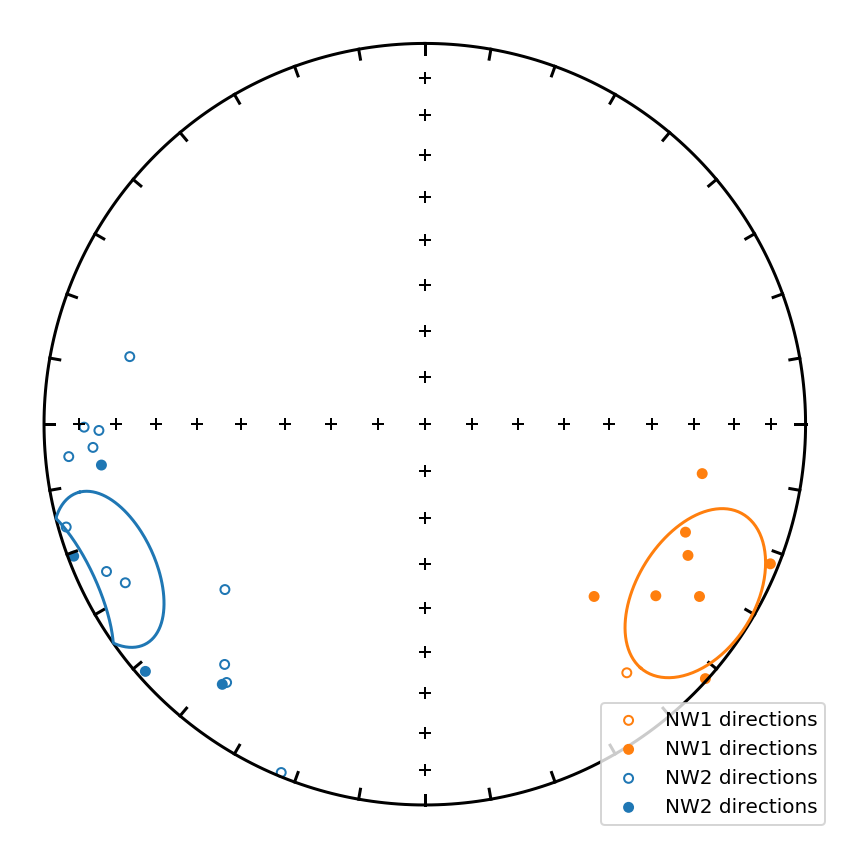

In [33]:
fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(fignum)
ipmag.plot_di(NW1_spec_hdt_tc['dir_dec'].tolist(),NW1_spec_hdt_tc['dir_inc'].tolist(),color='C1',label='NW1 directions')
ipmag.plot_di(NW2_spec_hdt_tc['dir_dec'].tolist(),NW2_spec_hdt_tc['dir_inc'].tolist(),color='C0',label='NW2 directions')
ipmag.plot_di_mean(NW1_spec_hdt_tc_mean['dec'], NW1_spec_hdt_tc_mean['inc'], NW1_spec_hdt_tc_mean['alpha95'], color = 'C1')
ipmag.plot_di_mean(NW2_spec_hdt_tc_mean['dec'], NW2_spec_hdt_tc_mean['inc'], NW2_spec_hdt_tc_mean['alpha95'], color = 'C0')



plt.legend(loc=4)
# plt.title('drastically different directions captured at Natural Wall')
plt.savefig('../Figures/Pmag/NW_directions.pdf')
plt.show()

#### NW VGPs

<Figure size 360x360 with 0 Axes>

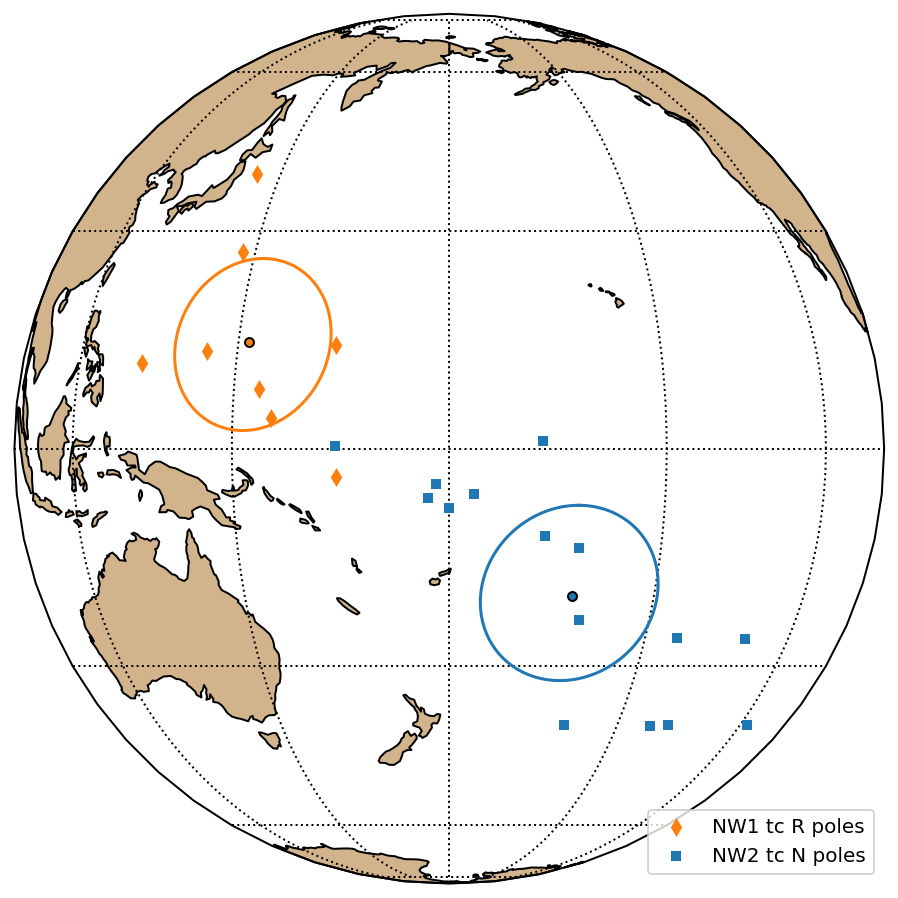

In [34]:
plt.figure(figsize=(5, 5))
map_axis=ipmag.make_orthographic_map(central_longitude=180,central_latitude=0)

ipmag.plot_vgp(map_axis, NW1_spec_hdt_tc['vgp_lon_rev'].tolist(), 
               NW1_spec_hdt_tc['vgp_lat_rev'].tolist(), 
               markersize = 45, 
               marker = 'd', 
               color = 'C1', 
               edge='none', 
               label = 'NW1 tc R poles')

ipmag.plot_vgp(map_axis, NW2_spec_hdt_tc['vgp_lon'].tolist(), 
               NW2_spec_hdt_tc['vgp_lat'].tolist(), 
               markersize = 25, 
               marker = 's', 
               color = 'C0', 
               edge='none', 
               label = 'NW2 tc N poles')

ipmag.plot_pole(map_axis, NW1_spec_hdt_tc_mean_pole['dec'], 
                NW1_spec_hdt_tc_mean_pole['inc'], 
                NW1_spec_hdt_tc_mean_pole['alpha95'], 
                color = 'C1', marker = 'o')
ipmag.plot_pole(map_axis, NW2_spec_hdt_tc_mean_pole['dec'], 
                NW2_spec_hdt_tc_mean_pole['inc'], 
                NW2_spec_hdt_tc_mean_pole['alpha95'], 
                color = 'C0', marker = 'o')

plt.legend(loc=4)
plt.savefig('../Figures/Pmag/NW_poles.pdf')
plt.show()

### section SC1 pmag results

This section at Baby Snake Creek in Keweenaw peninsula is the largest suite of red sandstone we collected. Massive, fine-grained, coherent sandstone through an approximately 95 meter section and we acquired 75 specimens from the site. 

In general the specimens have consistent nice directional results except for a few slightly abnormal directions that have inconsistent inclinations. 

In [35]:
SC1_spec_lt_mean = ipmag.fisher_mean(SC1_spec_lt['dir_dec'].tolist(), SC1_spec_lt['dir_inc'].tolist())

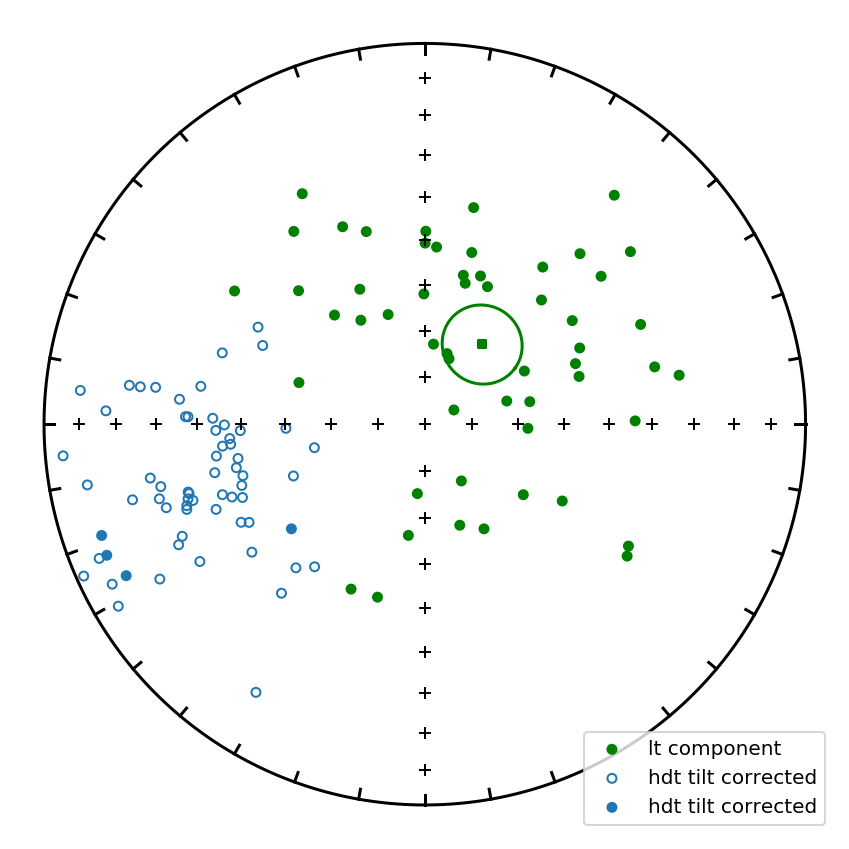

In [36]:
fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(fignum)

ipmag.plot_di(SC1_spec_lt['dir_dec'].tolist(),SC1_spec_lt['dir_inc'].tolist(),color='green',label='lt component')

ipmag.plot_di(SC1_spec_hdt_tc['dir_dec'].tolist(),SC1_spec_hdt_tc['dir_inc'].tolist(),color='C0',label='hdt tilt corrected')


ipmag.plot_di_mean(SC1_spec_lt_mean['dec'],SC1_spec_lt_mean['inc'],SC1_spec_lt_mean['alpha95'],
                   color='green', marker = 's')

plt.legend(loc=4)
# plt.savefig('../Figures/specimen_directions.pdf')
plt.show()

In [37]:
SC1_spec_hdt_tc = SC1_spec_hdt_tc[SC1_spec_hdt_tc['dir_inc'] < 0]

In [38]:
SC1_spec_hdt_gc_mean = ipmag.fisher_mean(SC1_spec_hdt_gc['dir_dec'].tolist(), SC1_spec_hdt_gc['dir_inc'].tolist())
SC1_spec_hdt_tc_mean = ipmag.fisher_mean(SC1_spec_hdt_tc['dir_dec'].tolist(), SC1_spec_hdt_tc['dir_inc'].tolist())

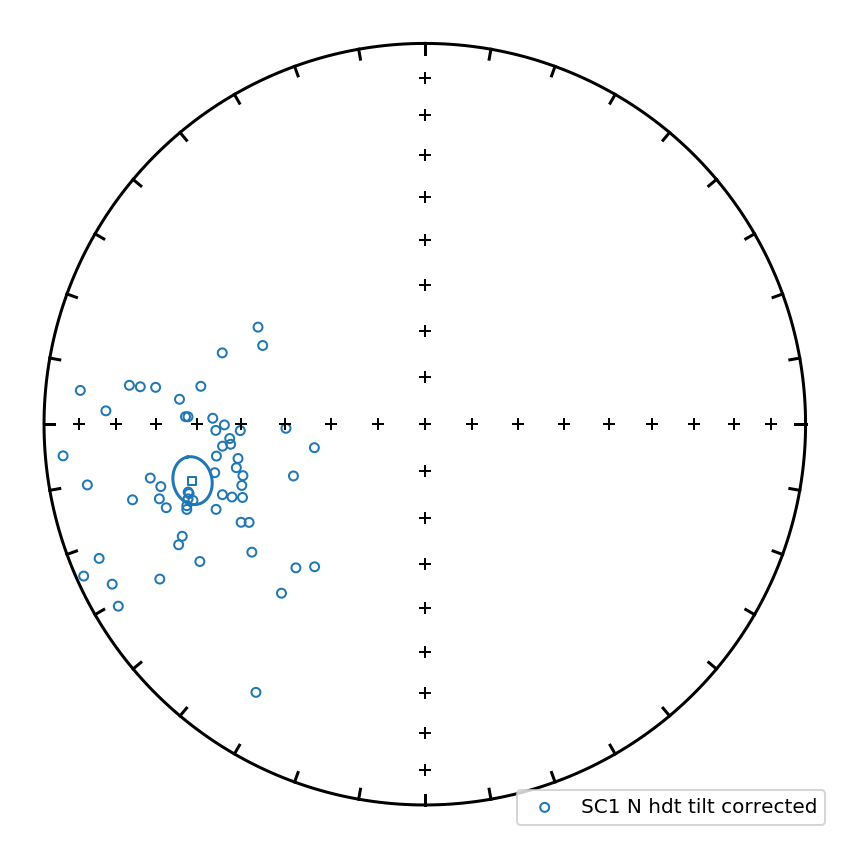

In [39]:
fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(fignum)

ipmag.plot_di(SC1_spec_hdt_tc['dir_dec'].tolist(),SC1_spec_hdt_tc['dir_inc'].tolist(),color='C0',label='SC1 N hdt tilt corrected')

ipmag.plot_di_mean(SC1_spec_hdt_tc_mean['dec'],SC1_spec_hdt_tc_mean['inc'],SC1_spec_hdt_tc_mean['alpha95'],
                   color='C0', marker = 's')

plt.legend(loc=4)
plt.savefig('../Figures/Pmag/SC1_directions.pdf')
plt.show()

In [40]:
SC1_spec_hdt_tc_mean_pole = ipmag.fisher_mean(SC1_spec_hdt_tc['vgp_lon'].tolist(), SC1_spec_hdt_tc['vgp_lat'].tolist())
ipmag.print_pole_mean(SC1_spec_hdt_tc_mean_pole)

Plon: 175.9  Plat: -24.9
Number of directions in mean (n): 60
Angular radius of 95% confidence (A_95): 4.3
Precision parameter (k) estimate: 18.8


#### SC1 VGPs

<Figure size 360x360 with 0 Axes>

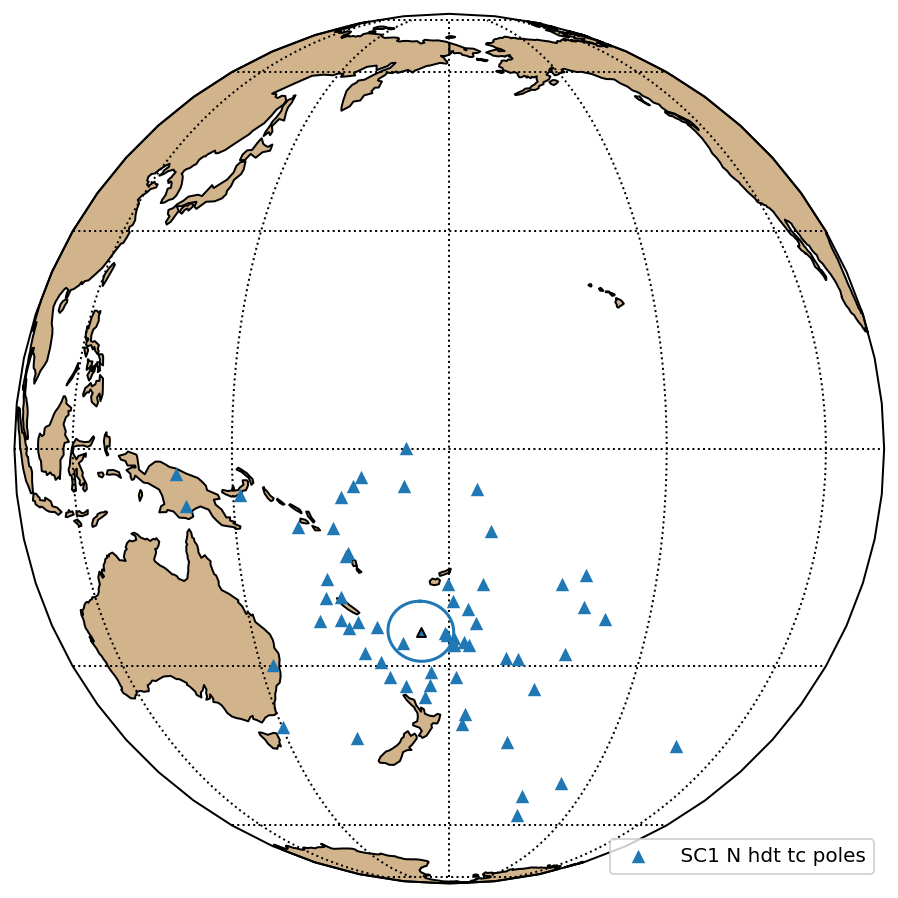

In [41]:
plt.figure(figsize=(5, 5))
map_axis=ipmag.make_orthographic_map(central_longitude=180,central_latitude=0)

ipmag.plot_vgp(map_axis, SC1_spec_hdt_tc['vgp_lon'].tolist(), 
               SC1_spec_hdt_tc['vgp_lat'].tolist(),
               markersize = 45, 
               marker = '^', 
               color = 'C0', 
               edge='none', 
               label = ' SC1 N hdt tc poles')

ipmag.plot_pole(map_axis, SC1_spec_hdt_tc_mean_pole['dec'], SC1_spec_hdt_tc_mean_pole['inc'], SC1_spec_hdt_tc_mean_pole['alpha95'], 
                color = 'C0', marker = '^')

plt.legend(loc=4)
plt.savefig('../Figures/Pmag/SC1_poles.pdf')
plt.show()

#### Unsquish SC1 ht component by 0.6

In [42]:
f = 0.6

SC1_spec_hdt_tc['dir_inc_unsquish'] = ipmag.unsquish(SC1_spec_hdt_tc['dir_inc'].tolist(), f)
SC1_spec_hdt_tc['vgp_lon_unsquish'] = pmag.dia_vgp(SC1_spec_hdt_tc['dir_dec'], SC1_spec_hdt_tc['dir_inc_unsquish'], 0, 47.3, -88.2)[0]
SC1_spec_hdt_tc['vgp_lat_unsquish'] = pmag.dia_vgp(SC1_spec_hdt_tc['dir_dec'], SC1_spec_hdt_tc['dir_inc_unsquish'], 0, 47.3, -88.2)[1]

SC1_spec_hdt_tc_unsquish_mean = ipmag.fisher_mean(SC1_spec_hdt_tc['dir_dec'].tolist(), SC1_spec_hdt_tc['dir_inc_unsquish'].tolist())
SC1_spec_hdt_tc_unsquish_mean_pole = ipmag.fisher_mean(SC1_spec_hdt_tc['vgp_lon_unsquish'].tolist(), SC1_spec_hdt_tc['vgp_lat_unsquish'].tolist())

In [43]:
ipmag.print_direction_mean(SC1_spec_hdt_tc_unsquish_mean)

Dec: 256.1  Inc: -49.9
Number of directions in mean (n): 60
Angular radius of 95% confidence (a_95): 4.6
Precision parameter (k) estimate: 16.8


In [44]:
ipmag.print_direction_mean(SC1_spec_hdt_tc_mean)

Dec: 256.3  Inc: -37.2
Number of directions in mean (n): 60
Angular radius of 95% confidence (a_95): 4.6
Precision parameter (k) estimate: 16.8


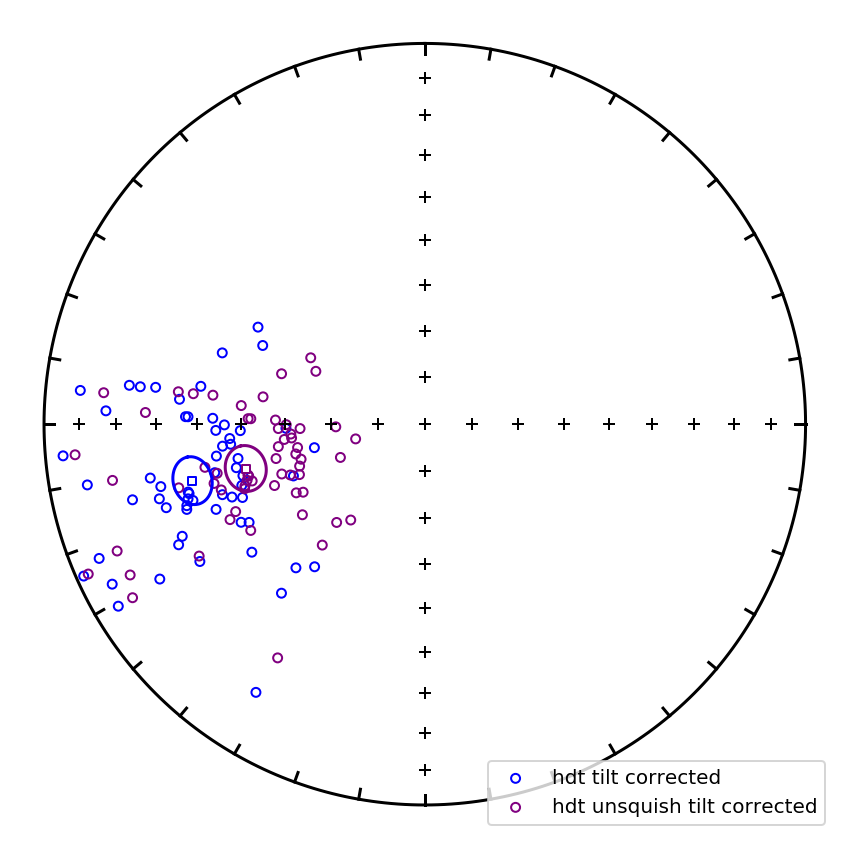

In [45]:
fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(fignum)

ipmag.plot_di(SC1_spec_hdt_tc['dir_dec'].tolist(),SC1_spec_hdt_tc['dir_inc'].tolist(),color='blue',label='hdt tilt corrected')
ipmag.plot_di(SC1_spec_hdt_tc['dir_dec'].tolist(),SC1_spec_hdt_tc['dir_inc_unsquish'].tolist(),color='purple',label='hdt unsquish tilt corrected')

ipmag.plot_di_mean(SC1_spec_hdt_tc_mean['dec'],SC1_spec_hdt_tc_mean['inc'],SC1_spec_hdt_tc_mean['alpha95'],
                   color='blue', marker = 's')
ipmag.plot_di_mean(SC1_spec_hdt_tc_unsquish_mean['dec'],SC1_spec_hdt_tc_unsquish_mean['inc'],SC1_spec_hdt_tc_unsquish_mean['alpha95'],
                   color='purple', marker = 's')

plt.legend(loc=4)
# plt.savefig('../Figures/specimen_directions.pdf')
plt.show()

<Figure size 360x360 with 0 Axes>

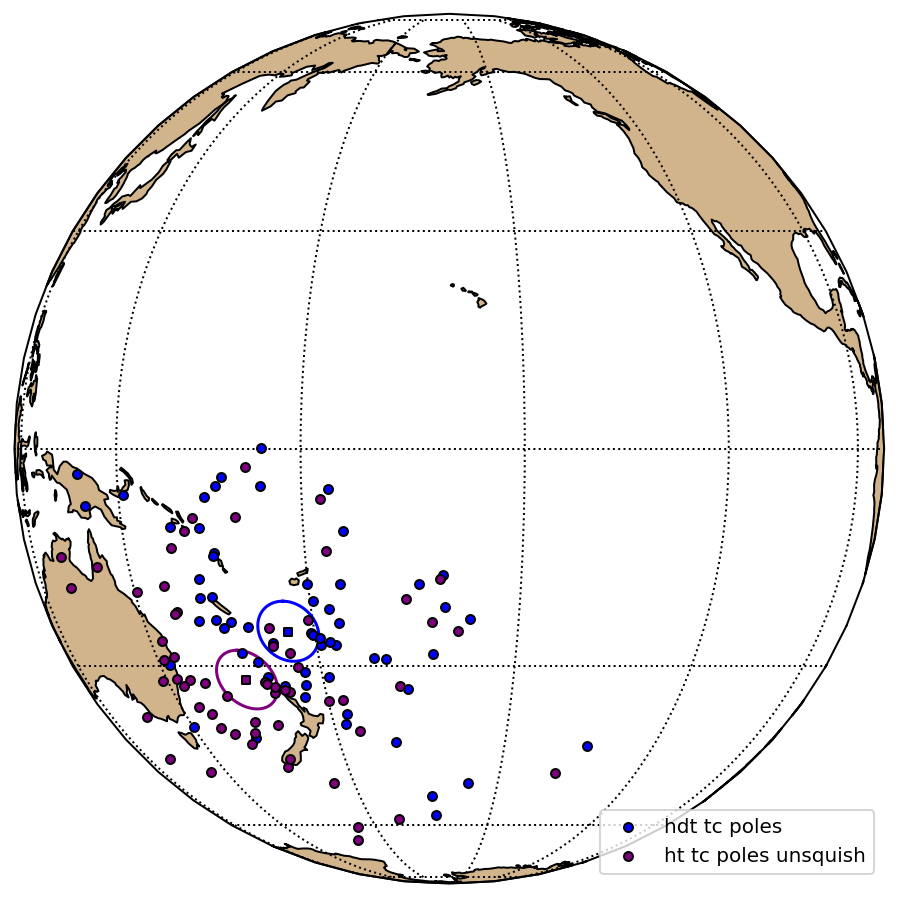

In [46]:
plt.figure(figsize=(5, 5))
map_axis=ipmag.make_orthographic_map(central_longitude=200,central_latitude=0)

ipmag.plot_vgp(map_axis, SC1_spec_hdt_tc['vgp_lon'].tolist(), SC1_spec_hdt_tc['vgp_lat'].tolist(), color = 'blue', label = 'hdt tc poles')
ipmag.plot_vgp(map_axis, SC1_spec_hdt_tc['vgp_lon_unsquish'].tolist(), SC1_spec_hdt_tc['vgp_lat_unsquish'].tolist(), 
               color = 'purple', label = 'ht tc poles unsquish')

ipmag.plot_pole(map_axis, SC1_spec_hdt_tc_mean_pole['dec'], SC1_spec_hdt_tc_mean_pole['inc'], SC1_spec_hdt_tc_mean_pole['alpha95'], 
                color = 'blue', marker = 's')
ipmag.plot_pole(map_axis, SC1_spec_hdt_tc_unsquish_mean_pole['dec'], SC1_spec_hdt_tc_unsquish_mean_pole['inc'], SC1_spec_hdt_tc_unsquish_mean_pole['alpha95'], 
                color = 'purple', marker = 's')


plt.legend(loc=4)
plt.show()

#### fold test on Baby Snake Creek data

In [47]:
Jacobsville_sample_data = pd.read_csv('../Data/Pmag_new/Jacobsville_samples.txt', sep='\t', header = 1)
SC1_sample_bedding_data = Jacobsville_sample_data[Jacobsville_sample_data['site'] == 'SC1'][['sample', 'bed_dip', 'bed_dip_direction']]
SC1_sample_bedding_data.head()

sample  bed_dip  bed_dip_direction
26  SC1-1      0.0               90.0
27  SC1-2      0.0               90.0
28  SC1-3      0.0               90.0
29  SC1-4      0.0               90.0
30  SC1-5      0.0               90.0

In [48]:
SC1_spec_hdt_fold_test = pd.merge(SC1_spec_hdt_gc[['specimen', 'sample', 'dir_dec', 'dir_inc']], SC1_sample_bedding_data, left_on='sample', right_on='sample')
SC1_spec_hdt_fold_test.head()

specimen  sample  dir_dec  dir_inc  bed_dip  bed_dip_direction
0  SC1-10a  SC1-10    257.1    -18.2      0.0               90.0
1  SC1-11a  SC1-11    204.6    -18.3      0.0               90.0
2  SC1-12a  SC1-12    222.5    -31.3      0.0               90.0
3  SC1-16a  SC1-16    201.9    -18.2      0.0               90.0
4  SC1-17a  SC1-17    218.0    -31.1      0.0               90.0

In [49]:
# ipmag.bootstrap_fold_test(SC1_spec_hdt_fold_test[['dir_dec', 'dir_inc', 'bed_dip_direction', 'bed_dip']].to_numpy())


### section JK2 pmag component

In [50]:
JK2_spec_lt_mean = ipmag.fisher_mean(JK2_spec_lt['dir_dec'].tolist(), JK2_spec_lt['dir_inc'].tolist())
JK2_spec_hdt_gc_mean = ipmag.fisher_mean(JK2_spec_hdt_gc['dir_dec'].tolist(), JK2_spec_hdt_gc['dir_inc'].tolist())
JK2_spec_hdt_tc_mean = ipmag.fisher_mean(JK2_spec_hdt_tc['dir_dec'].tolist(), JK2_spec_hdt_tc['dir_inc'].tolist())

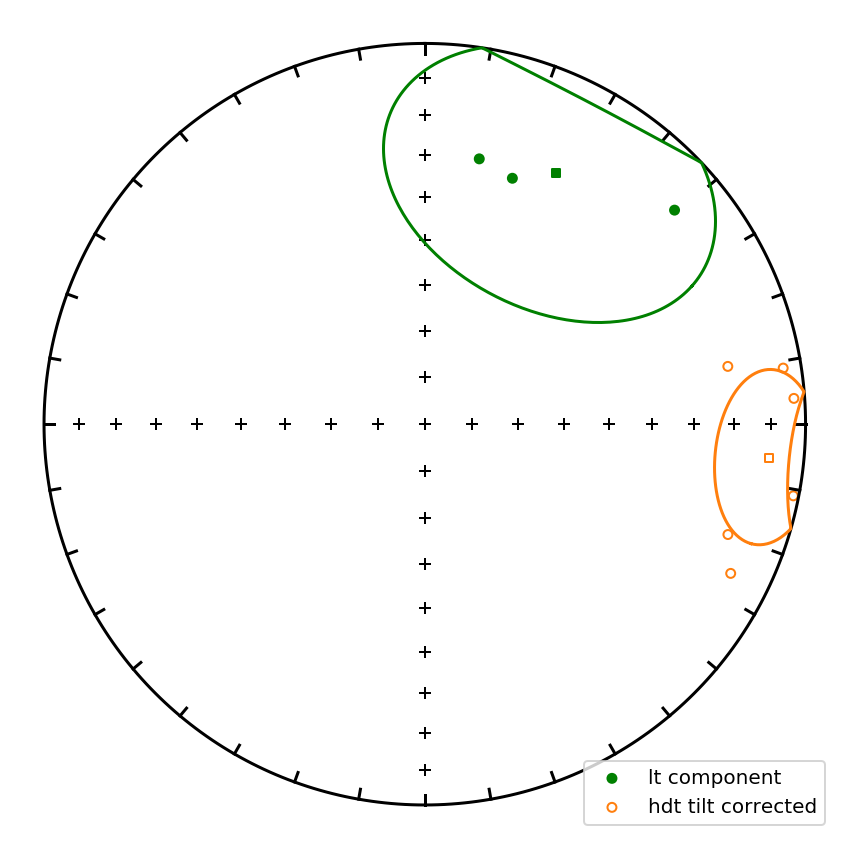

In [51]:
fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(fignum)

ipmag.plot_di(JK2_spec_lt['dir_dec'].tolist(),JK2_spec_lt['dir_inc'].tolist(),color='green',label='lt component')

ipmag.plot_di(JK2_spec_hdt_tc['dir_dec'].tolist(),JK2_spec_hdt_tc['dir_inc'].tolist(),color='C1',label='hdt tilt corrected')


ipmag.plot_di_mean(JK2_spec_lt_mean['dec'],JK2_spec_lt_mean['inc'],JK2_spec_lt_mean['alpha95'],
                   color='green', marker = 's')
ipmag.plot_di_mean(JK2_spec_hdt_tc_mean['dec'],JK2_spec_hdt_tc_mean['inc'],JK2_spec_hdt_tc_mean['alpha95'],
                   color='C1', marker = 's')

plt.legend(loc=4)
# plt.savefig('../Figures/specimen_directions.pdf')
plt.show()

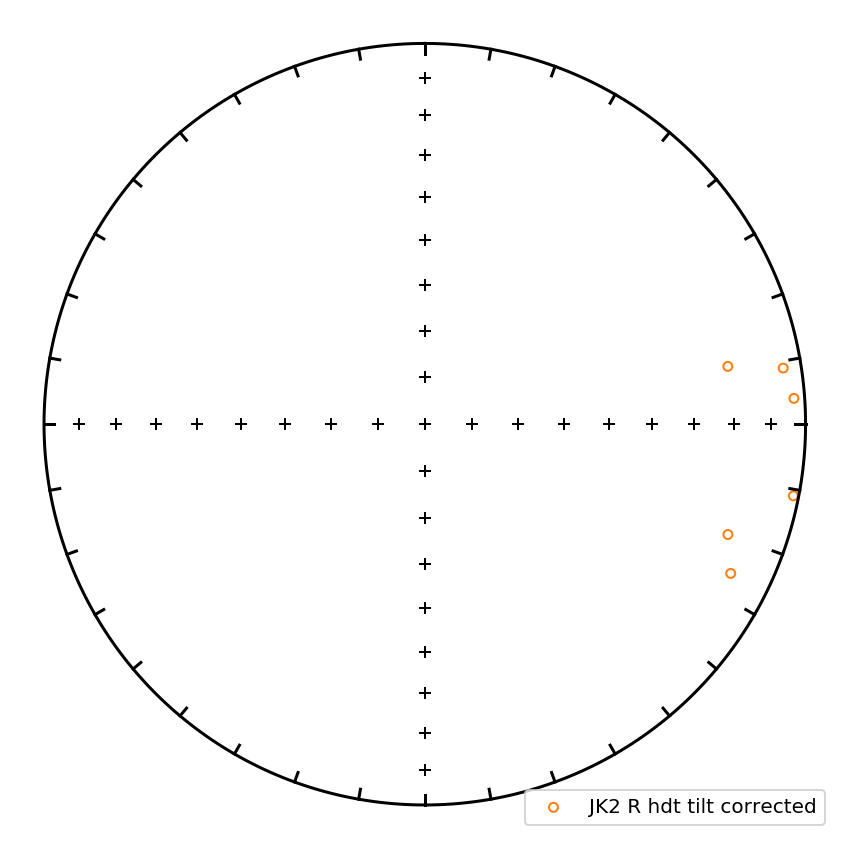

In [52]:
fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(fignum)

ipmag.plot_di(JK2_spec_hdt_tc['dir_dec'].tolist(),JK2_spec_hdt_tc['dir_inc'].tolist(),color='C1',label='JK2 R hdt tilt corrected')
# ipmag.plot_di_mean(JK2_spec_hdt_tc_mean['dec'],JK2_spec_hdt_tc_mean['inc'],JK2_spec_hdt_tc_mean['alpha95'],
#                    color='C0', marker = 's')

plt.legend(loc=4)
plt.savefig('../Figures/Pmag/JK2_directions.pdf')
plt.show()

In [53]:
JK2_spec_hdt_tc_mean_pole = ipmag.fisher_mean(JK2_spec_hdt_tc['vgp_lon_rev'].tolist(), JK2_spec_hdt_tc['vgp_lat_rev'].tolist())

#### JK2 VGPs

<Figure size 360x360 with 0 Axes>

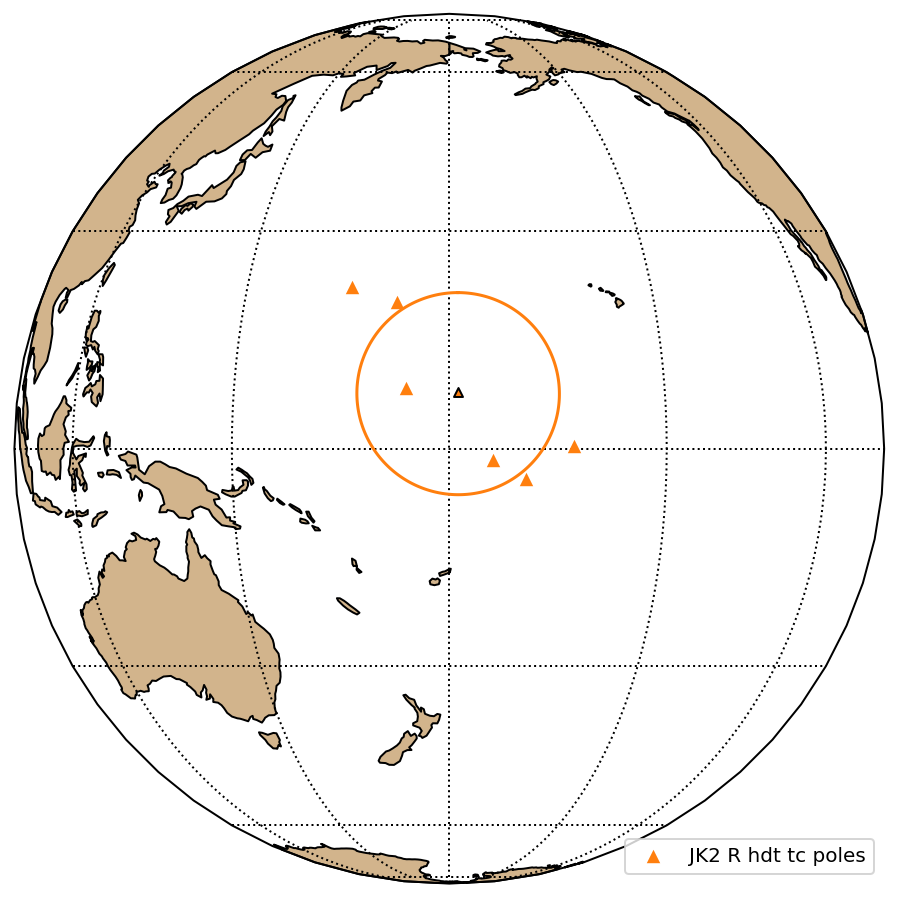

In [54]:
plt.figure(figsize=(5, 5))
map_axis=ipmag.make_orthographic_map(central_longitude=180,central_latitude=0)

ipmag.plot_vgp(map_axis, JK2_spec_hdt_tc['vgp_lon_rev'].tolist(), 
               JK2_spec_hdt_tc['vgp_lat_rev'].tolist(), 
               markersize = 45, 
               marker = '^', 
               color = 'C1', 
               edge='none', 
               label = 'JK2 R hdt tc poles')

ipmag.plot_pole(map_axis, JK2_spec_hdt_tc_mean_pole['dec'], JK2_spec_hdt_tc_mean_pole['inc'], JK2_spec_hdt_tc_mean_pole['alpha95'], 
                color = 'C1', marker = '^')

plt.legend(loc=4)
plt.savefig('../Figures/Pmag/JK2_poles.pdf')
plt.show()

### section JK3 pmag component

In [55]:
JK3_spec_lt_mean = ipmag.fisher_mean(JK3_spec_lt['dir_dec'].tolist(), JK3_spec_lt['dir_inc'].tolist())
JK3_spec_hdt_gc_mean = ipmag.fisher_mean(JK3_spec_hdt_gc['dir_dec'].tolist(), JK3_spec_hdt_gc['dir_inc'].tolist())
JK3_spec_hdt_tc_mean = ipmag.fisher_mean(JK3_spec_hdt_tc['dir_dec'].tolist(), JK3_spec_hdt_tc['dir_inc'].tolist())

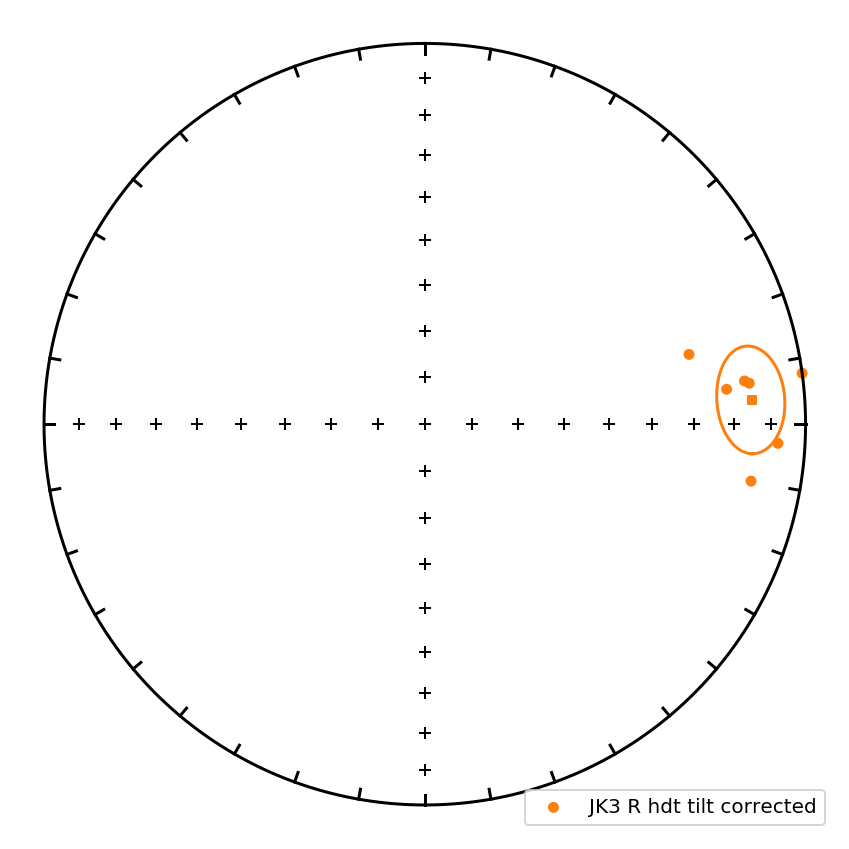

In [56]:
fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(fignum)

# ipmag.plot_di(JK3_spec_lt['dir_dec'].tolist(),JK3_spec_lt['dir_inc'].tolist(),color='green',label='lt component')

ipmag.plot_di(JK3_spec_hdt_tc['dir_dec'].tolist(),JK3_spec_hdt_tc['dir_inc'].tolist(),color='C1',label='JK3 R hdt tilt corrected')


# ipmag.plot_di_mean(JK3_spec_lt_mean['dec'],JK3_spec_lt_mean['inc'],JK3_spec_lt_mean['alpha95'],
#                    color='green', marker = 's')
ipmag.plot_di_mean(JK3_spec_hdt_tc_mean['dec'],JK3_spec_hdt_tc_mean['inc'],JK3_spec_hdt_tc_mean['alpha95'],
                   color='C1', marker = 's')


plt.legend(loc=4)
plt.savefig('../Figures/Pmag/JK3_directions.pdf')
plt.show()

In [57]:
JK3_spec_hdt_tc_mean_pole = ipmag.fisher_mean(JK3_spec_hdt_tc['vgp_lon_rev'].tolist(), JK3_spec_hdt_tc['vgp_lat_rev'].tolist())

#### JK3 VGPs

<Figure size 360x360 with 0 Axes>

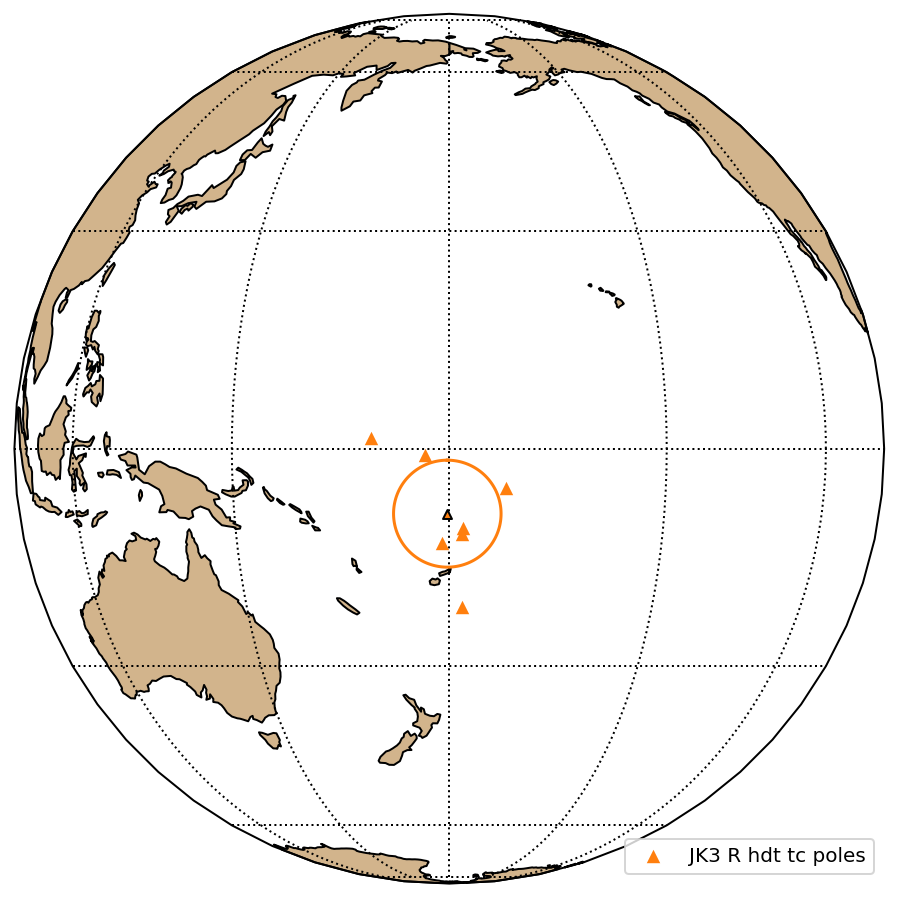

In [58]:
plt.figure(figsize=(5, 5))
map_axis=ipmag.make_orthographic_map(central_longitude=180,central_latitude=0)

ipmag.plot_vgp(map_axis, JK3_spec_hdt_tc['vgp_lon_rev'].tolist(), 
               JK3_spec_hdt_tc['vgp_lat_rev'].tolist(), 
               markersize = 45, 
               marker = '^', 
               color = 'C1', 
               edge='none', 
               label = 'JK3 R hdt tc poles')

ipmag.plot_pole(map_axis, JK3_spec_hdt_tc_mean_pole['dec'], JK3_spec_hdt_tc_mean_pole['inc'], JK3_spec_hdt_tc_mean_pole['alpha95'], 
                color = 'C1', marker = '^')

plt.legend(loc=4)
plt.savefig('../Figures/Pmag/JK3_poles.pdf')
plt.show()

### Plot all new pmag poles

<Figure size 360x360 with 0 Axes>

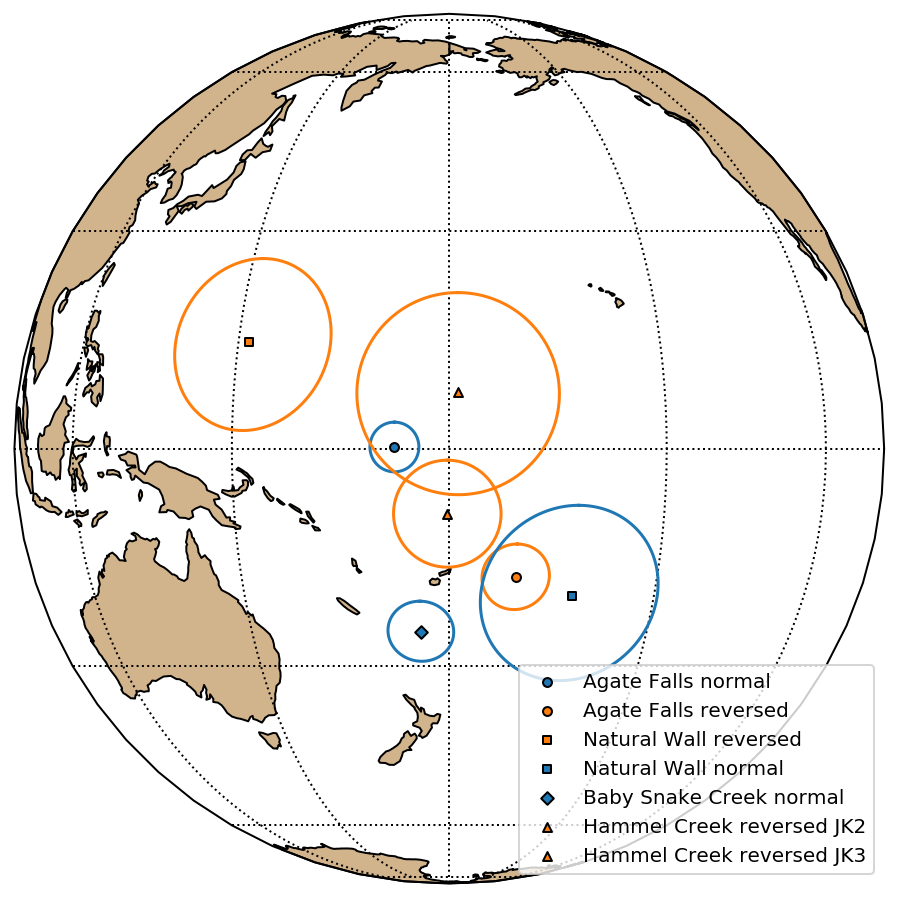

In [59]:
plt.figure(figsize=(5, 5))
map_axis=ipmag.make_orthographic_map(central_longitude=180,central_latitude=0)
ipmag.plot_pole(map_axis, AF1_spec_hdt_tc_N_mean_pole['dec'], 
                AF1_spec_hdt_tc_N_mean_pole['inc'], 
                AF1_spec_hdt_tc_N_mean_pole['alpha95'], 
                color = 'C0', 
                marker = 'o', 
                label = 'Agate Falls normal')
ipmag.plot_pole(map_axis, AF1_spec_hdt_tc_R_mean_pole['dec'], 
                AF1_spec_hdt_tc_R_mean_pole['inc'], 
                AF1_spec_hdt_tc_R_mean_pole['alpha95'], 
                color = 'C1', 
                marker = 'o', 
                label = 'Agate Falls reversed')

ipmag.plot_pole(map_axis, NW1_spec_hdt_tc_mean_pole['dec'], 
                NW1_spec_hdt_tc_mean_pole['inc'], 
                NW1_spec_hdt_tc_mean_pole['alpha95'], 
                color = 'C1', 
                marker = 's', 
                label = 'Natural Wall reversed')
ipmag.plot_pole(map_axis, NW2_spec_hdt_tc_mean_pole['dec'], 
                NW2_spec_hdt_tc_mean_pole['inc'], 
                NW2_spec_hdt_tc_mean_pole['alpha95'], 
                color = 'C0', 
                marker = 's', 
                label = 'Natural Wall normal')

ipmag.plot_pole(map_axis, SC1_spec_hdt_tc_mean_pole['dec'], 
                SC1_spec_hdt_tc_mean_pole['inc'], 
                SC1_spec_hdt_tc_mean_pole['alpha95'], 
                color = 'C0', 
                marker = 'D', 
                label = 'Baby Snake Creek normal')

ipmag.plot_pole(map_axis, JK2_spec_hdt_tc_mean_pole['dec'], 
                JK2_spec_hdt_tc_mean_pole['inc'], 
                JK2_spec_hdt_tc_mean_pole['alpha95'], 
                color = 'C1', marker = '^', 
                label = 'Hammel Creek reversed JK2')

ipmag.plot_pole(map_axis, JK3_spec_hdt_tc_mean_pole['dec'], 
                JK3_spec_hdt_tc_mean_pole['inc'], 
                JK3_spec_hdt_tc_mean_pole['alpha95'], 
                color = 'C1', marker = '^', 
                label = 'Hammel Creek reversed JK3')

# ipmag.plot_pole(map_axis, Jacobsville_reversed_mean_pole['dec'], 
#                 Jacobsville_reversed_mean_pole['inc'], 
#                 Jacobsville_reversed_mean_pole['alpha95'], 
#                 color = 'C1', 
#                 marker = '^')

plt.legend(loc=4)
plt.show()

- Sample AF1-29.3 yielded six CA-ID-TIMS 206Pb/238U dates ranging from 1073 to 1003 Ma
- sample sandstone creek SC18-1 yielded eleven CA-ID-TIMS 206Pb/238U dates ranging from 1096 to 992 Ma
- sample NW1-61.5 yielded two CA-ID-TIMS 206Pb/238U dates ranging from 1090 to 1082 Ma

**Overall there are in general both normal and reversed polarities captured by the Jacobsville. However large scatter and noise demagnetization due to (likely) the medium to fine sandstone grain size make the directions difficult to gorup. Based on the overall directional similarities and the available geochronology data, we attempt to group paleomagentic directions between different sections and infer for their stratigraphic correlations.**

### combine normal and inclination up directions from Roy (1978), AF1, SC1, NW2, and Dubois (1962)

The normal directions from different studies and different sections are quite different... This could be due to the large scatter of the demagnetization fits; and due to the reversal that was captured by the AF1 section (meaning that there are some transitional fields that is not so distinct to be found from the directions, but are significantly different from the stable dipole component to cause large scatter in the overall dataset. Here we attempt to combine all the normal directions from our sections and those from Roy (1978) and Dubois (1962).

In [60]:
Roy_AF1_SC1_NW2_Dubois = pd.concat([Roy1978a_sites_normal, 
                                    AF1_spec_hdt_tc_N, 
                                    SC1_spec_hdt_tc, 
                                    NW2_spec_hdt_tc, 
                                    Dubois1962a_samples_kewee])
# Roy_AF1_SC1_NW2_Dubois = pd.concat([ 
#                                     AF1_spec_hdt_tc_N, 
#                                     SC1_spec_hdt_tc, 
#                                     NW2_spec_hdt_tc, 
#                                     ])
Roy_AF1_SC1_NW2_Dubois = Roy_AF1_SC1_NW2_Dubois[Roy_AF1_SC1_NW2_Dubois['dir_inc'] < 0]
Roy_AF1_SC1_NW2_Dubois_mean_pole = ipmag.fisher_mean(Roy_AF1_SC1_NW2_Dubois['vgp_lon'].tolist(), 
                                                   Roy_AF1_SC1_NW2_Dubois['vgp_lat'].tolist())
Roy_AF1_SC1_NW2_Dubois_mean_pole

{'dec': 181.16442441878212,
 'inc': -18.430148978295414,
 'n': 114,
 'r': 106.46455868311058,
 'k': 14.995803861776428,
 'alpha95': 3.5339085790827505,
 'csd': 20.917035966630287}

<Figure size 360x360 with 0 Axes>

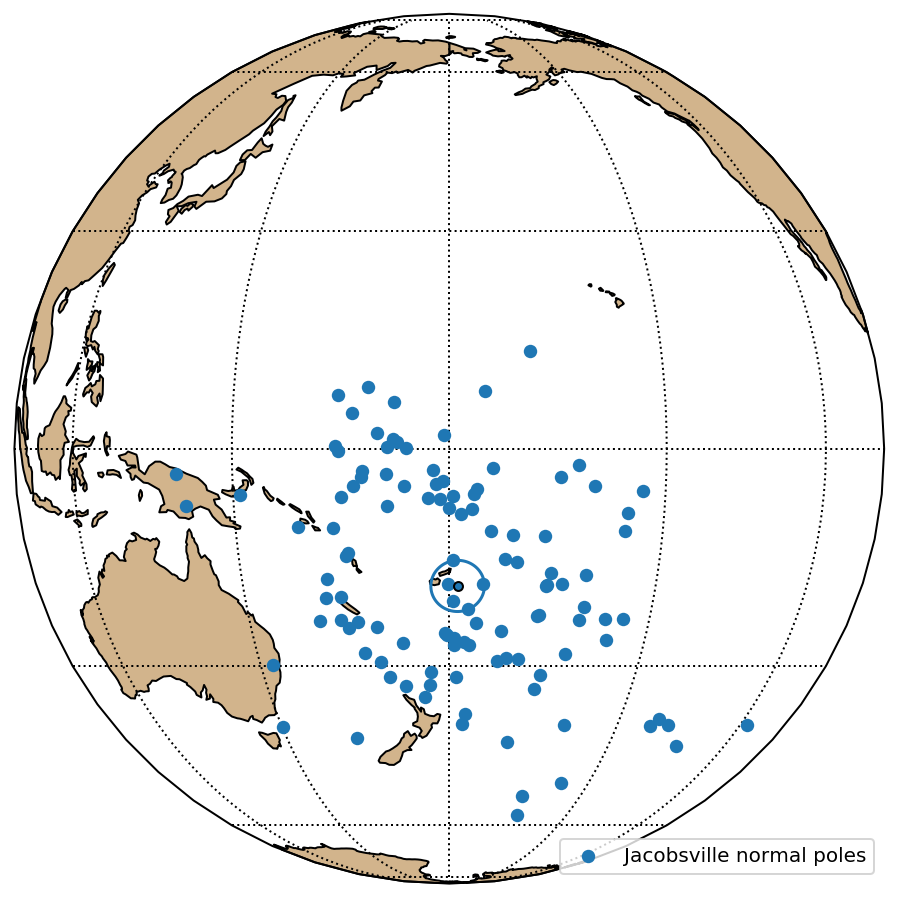

In [61]:
plt.figure(figsize=(5, 5))
map_axis=ipmag.make_orthographic_map(central_longitude=180,central_latitude=0)

ipmag.plot_vgp(map_axis, Roy_AF1_SC1_NW2_Dubois['vgp_lon'].tolist(), 
               Roy_AF1_SC1_NW2_Dubois['vgp_lat'].tolist(), markersize = 45, 
               marker = 'o', color = 'C0', edge='none', label = 'Jacobsville normal poles')

ipmag.plot_pole(map_axis, Roy_AF1_SC1_NW2_Dubois_mean_pole['dec'], Roy_AF1_SC1_NW2_Dubois_mean_pole['inc'], 
                Roy_AF1_SC1_NW2_Dubois_mean_pole['alpha95'], 
                color = 'C0', marker = 'o')

plt.legend(loc=4)
plt.savefig('../Figures/Pmag/Jacobsville_normal_poles.pdf')
plt.show()

### combine reversed direction from Roy (1978) and JK3 and the reversed ones captured by AF1. 

The reversed directions (orange) from Agate Falls are very consistent and are similar to the reversed directions recorded by JK3 at Hemmel Creek. 

In [62]:
Roy_JK3_AF1 = pd.concat([Roy1978a_sites_reversed, JK3_spec_hdt_tc ,AF1_spec_hdt_tc_R])
Roy_JK3_AF1_mean_pole = ipmag.fisher_mean(Roy_JK3_AF1['vgp_lon_rev'].tolist(), 
                                                   Roy_JK3_AF1['vgp_lat_rev'].tolist())
Roy_JK3_AF1_mean_pole

{'dec': 186.89320592172672,
 'inc': -11.721372715441376,
 'n': 19,
 'r': 18.59037332359407,
 'k': 43.94245061852948,
 'alpha95': 5.11997525175424,
 'csd': 12.219203065256016}

<Figure size 360x360 with 0 Axes>

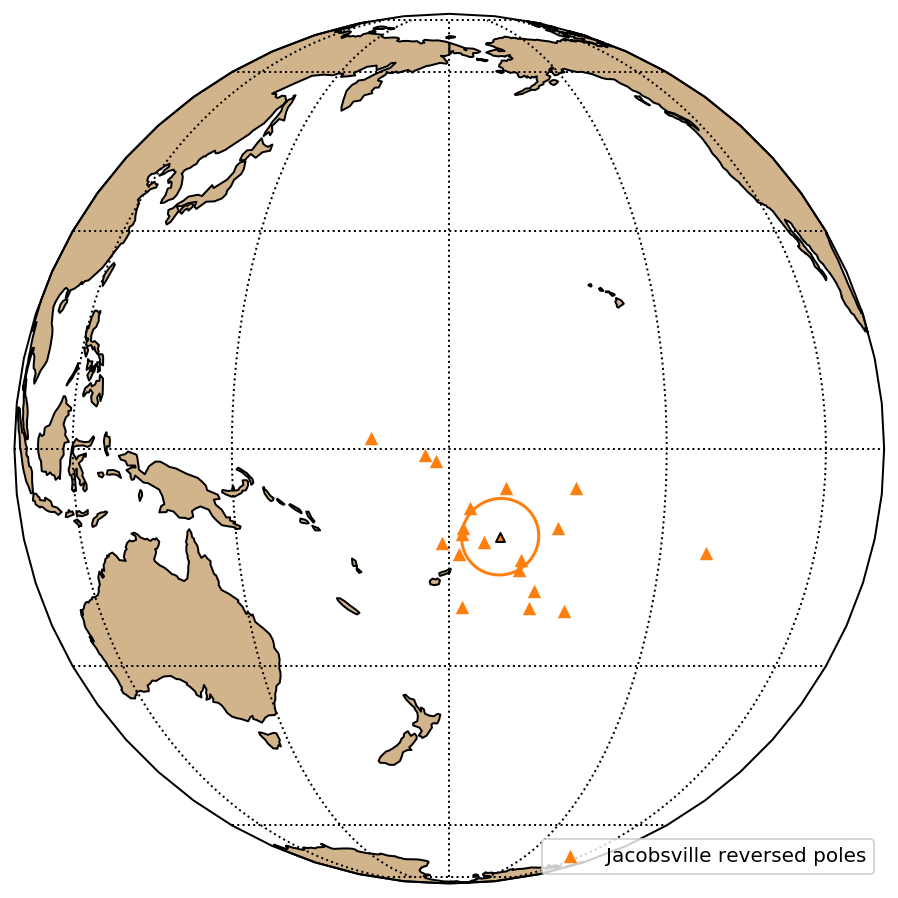

In [63]:
plt.figure(figsize=(5, 5))
map_axis=ipmag.make_orthographic_map(central_longitude=180,central_latitude=0)

ipmag.plot_vgp(map_axis, Roy_JK3_AF1['vgp_lon_rev'].tolist(), 
               Roy_JK3_AF1['vgp_lat_rev'].tolist(), markersize = 45, 
               marker = '^', color = 'C1', edge='none', label = 'Jacobsville reversed poles')

ipmag.plot_pole(map_axis, Roy_JK3_AF1_mean_pole['dec'], Roy_JK3_AF1_mean_pole['inc'], 
                Roy_JK3_AF1_mean_pole['alpha95'], 
                color = 'C1', marker = '^')

plt.legend(loc=4)
plt.savefig('../Figures/Pmag/Jacobsville_reversed_poles.pdf')
plt.show()

### Plot poles with Keweenawan track

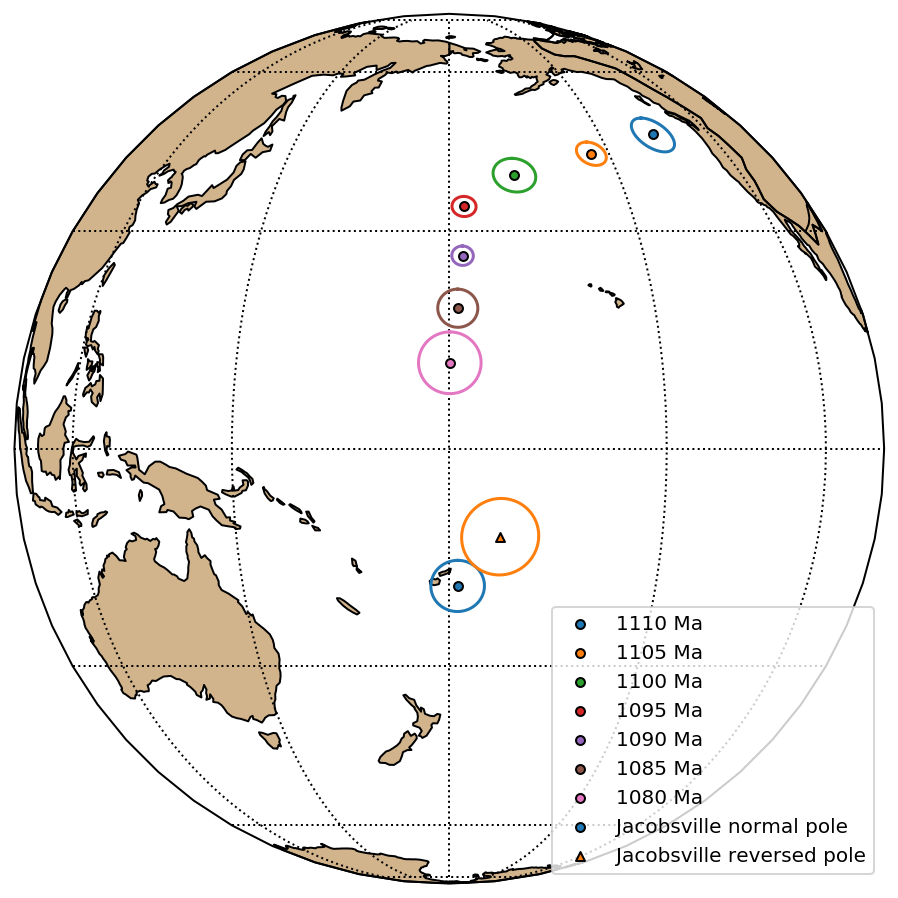

In [64]:
one_Euler_pole_lon = np.loadtxt('../Data/Keweenawan_track/pole_lon_positions_2_true.txt')
one_Euler_pole_lat = np.loadtxt('../Data/Keweenawan_track/pole_lat_positions_2_true.txt')

m = ipmag.make_orthographic_map(central_latitude=0,central_longitude=180)
m.add_feature(Laurentia_outline)
plt.figure(num=1,figsize=(10, 10))

fisher0 = ipmag.fisher_mean(one_Euler_pole_lon[:,0]+180,one_Euler_pole_lat[:,0])
theta0 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,0]+180,one_Euler_pole_lat[:,0])
fisher0['theta'] = theta0
ipmag.plot_pole(m,fisher0['dec'],fisher0['inc'],theta0,color='C0',label='1110 Ma')

fisher1 = ipmag.fisher_mean(one_Euler_pole_lon[:,1]+180,one_Euler_pole_lat[:,1])
theta1 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,1]+180,one_Euler_pole_lat[:,1])
fisher1['theta'] = theta1
ipmag.plot_pole(m,fisher1['dec'],fisher1['inc'],theta1,color='C1',label='1105 Ma')

fisher2 = ipmag.fisher_mean(one_Euler_pole_lon[:,2]+180,one_Euler_pole_lat[:,2])
theta2 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,2]+180,one_Euler_pole_lat[:,2])
fisher2['theta'] = theta2
ipmag.plot_pole(m,fisher2['dec'],fisher2['inc'],theta2,color='C2',label='1100 Ma')

fisher3 = ipmag.fisher_mean(one_Euler_pole_lon[:,3]+180,one_Euler_pole_lat[:,3])
theta3 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,3]+180,one_Euler_pole_lat[:,3])
fisher3['theta'] = theta3
ipmag.plot_pole(m,fisher3['dec'],fisher3['inc'],theta3,color='C3',label='1095 Ma')

fisher4 = ipmag.fisher_mean(one_Euler_pole_lon[:,4]+180,one_Euler_pole_lat[:,4])
theta4 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,4]+180,one_Euler_pole_lat[:,4])
fisher4['theta'] = theta4
ipmag.plot_pole(m,fisher4['dec'],fisher4['inc'],theta4,color='C4',label='1090 Ma')

fisher5 = ipmag.fisher_mean(one_Euler_pole_lon[:,5]+180,one_Euler_pole_lat[:,5])
theta5 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,5]+180,one_Euler_pole_lat[:,5])
fisher5['theta'] = theta5
ipmag.plot_pole(m,fisher5['dec'],fisher5['inc'],theta5,color='C5',label='1085 Ma')

fisher6 = ipmag.fisher_mean(one_Euler_pole_lon[:,6]+180,one_Euler_pole_lat[:,6])
theta6 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,6]+180,one_Euler_pole_lat[:,6])
fisher6['theta'] = theta6
ipmag.plot_pole(m,fisher6['dec'],fisher6['inc'],theta6,color='C6',label='1080 Ma')

ipmag.plot_pole(m, Roy_AF1_SC1_NW2_Dubois_mean_pole['dec'], Roy_AF1_SC1_NW2_Dubois_mean_pole['inc'], 
                Roy_AF1_SC1_NW2_Dubois_mean_pole['alpha95'], 
                color = 'C0', marker = 'o', label = 'Jacobsville normal pole')

ipmag.plot_pole(m, Roy_JK3_AF1_mean_pole['dec'], Roy_JK3_AF1_mean_pole['inc'], 
                Roy_JK3_AF1_mean_pole['alpha95'], 
                color = 'C1', marker = '^', label = 'Jacobsville reversed pole')

plt.legend(loc=4)
plt.savefig('../Figures/Kewee_Track_Jacobsville.pdf')
plt.show()

### Overview APWP

In [65]:
Laurentia_poles = pd.read_csv('../Data/Laurentia_poles/Laurentia_poles.csv')
Laurentia_poles = Laurentia_poles[8:]
Laurentia_poles.head()

Unnamed: 0                    PoleName  SLat    SLon  PLat   PLon  \
8       Mackenzie  Mackenzie dykes grand mean  65.0  250.00   4.0  190.0   
9         Sudbury      Sudbury Dykes Combined  46.3  278.60  -2.5  192.8   
10     Lamp_dikes           Lamprophyre dikes  48.8  273.30  58.0  223.3   
11  Abitibi_dikes               Abitibi dykes  48.0  279.00  44.4  211.4   
12       Osler_R1       Osler reverse (lower)  48.8  272.34  40.9  218.6   

     A95     K     N                      PolarityZone  \
8    5.0   NaN   5.0                               NaN   
9    2.5   NaN  52.0                               NaN   
10   9.2  37.8  19.0                 multiple polarity   
11  13.5   NaN   8.0                 multiple polarity   
12   4.8  31.5  30.0  Alona Bay reversed-polarity zone   

                                              PmagRef  AgeNominal  AgeLower  \
8                                 Buchan et al., 2000      1267.0   1265.00   
9            Palmer,H.C., Merz,B.A., Hayatsu,A., 1977      1237.0   1232.00   
10                                Piispa et al., 2018      1144.0   1130.00   
11  Ernst and Buchan (1993) and Halls et al. (2005...      1141.0   1139.00   
12                       Swanson-Hysell et al., 2014b      1108.0   1105.15   

    AgeUpper                                            AgeInfo  \
8     1269.0                                                NaN   
9     1242.0                                                NaN   
10    1155.0         U-Pb perovskite and Ar-Ar phlogopite dates   
11    1143.0                           U-Pb date on baddeleyite   
12    1110.0  Older than 1105.15 $\pm$ 0.33 Ma Osler reverse...   

                                   AgeRef  Gaussian_2sigma GaussianOrUniform  \
8                                     NaN              NaN               NaN   
9                                     NaN              NaN               NaN   
10                    Queen et al. (1996)              NaN               NaN   
11                      Krogh et al. 1987              NaN               NaN   
12  Davis and Sutcliffe, 1985; this study              NaN           uniform   

      Q    color  
8   NaN      NaN  
9   NaN      NaN  
10  NaN      NaN  
11  NaN      NaN  
12  7.0  #B82431

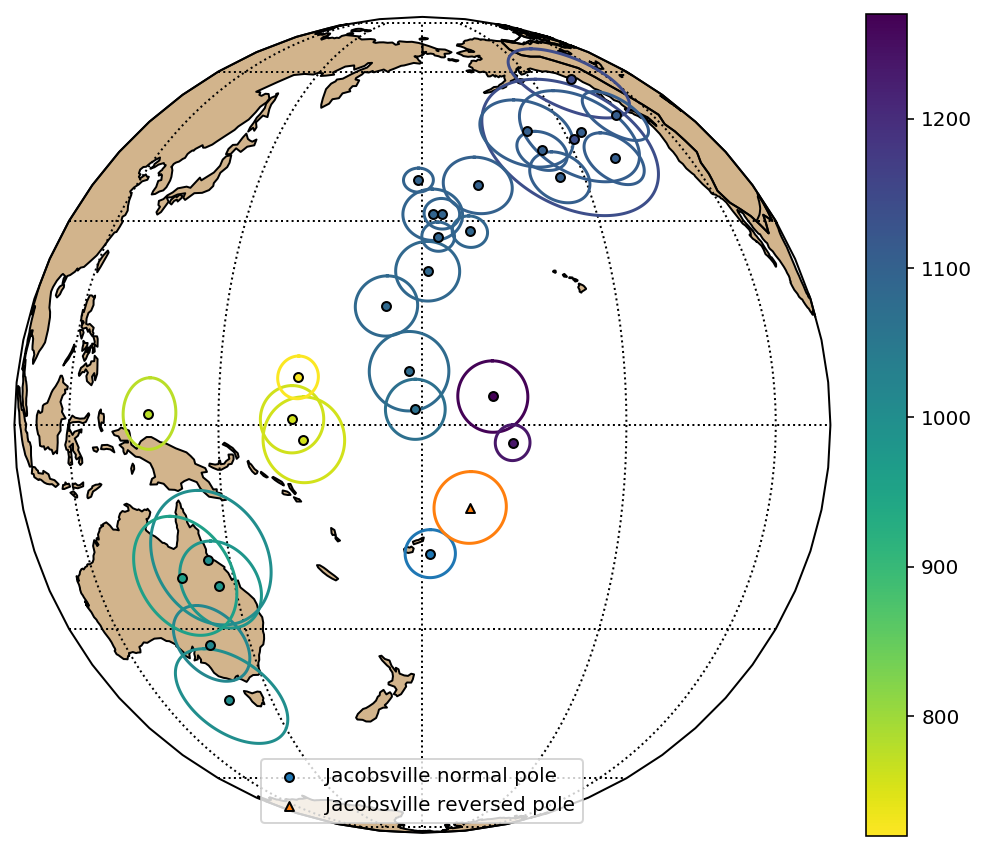

In [66]:
m = ipmag.make_orthographic_map(central_latitude=0,central_longitude=180)
m.add_feature(Laurentia_outline)
plt.figure(num=1,figsize=(10, 10))

viridis = cm = plt.get_cmap('viridis') 
cNorm  = colors.Normalize(vmin=720, vmax=1270)
# scalarMap = matplotlib.cm.ScalarMappable(norm=cNorm, cmap='viridis_r')
scalarMap = matplotlib.cm.ScalarMappable(norm=cNorm, cmap='viridis_r')

for n in Laurentia_poles.index:
    rgba = scalarMap.to_rgba(Laurentia_poles.AgeNominal[n])
    hex_color = colors.rgb2hex(rgba)
#     hex_color
    ipmag.plot_pole(m,Laurentia_poles.PLon[n],Laurentia_poles.PLat[n],Laurentia_poles.A95[n],color=hex_color)

Jacobsville_color = colors.rgb2hex(scalarMap.to_rgba(995))
ipmag.plot_pole(m, Roy_AF1_SC1_NW2_Dubois_mean_pole['dec'], Roy_AF1_SC1_NW2_Dubois_mean_pole['inc'], 
                Roy_AF1_SC1_NW2_Dubois_mean_pole['alpha95'], 
                color = 'C0', marker = 'o', label = 'Jacobsville normal pole')

ipmag.plot_pole(m, Roy_JK3_AF1_mean_pole['dec'], Roy_JK3_AF1_mean_pole['inc'], 
                Roy_JK3_AF1_mean_pole['alpha95'], 
                color = 'C1', marker = '^', label = 'Jacobsville reversed pole')

scalarMap.set_array(np.linspace(720,1110))    
plt.colorbar(scalarMap,orientation='vertical',fraction=0.046, pad=0.04)
plt.legend(loc=8)
plt.savefig('../Figures/Kewee_Track_Grenville_Loop.pdf')
plt.show()

### test E/I method

Bootstrapping.... be patient

The original inclination was: 34.25610446215444

The corrected inclination is: 36.81261728956039
with bootstrapped confidence bounds of: 30.98911806265339 to 50.556604117680976
and elongation parameter of: 2.036321777039035
The flattening factor is: 0.9049999999999999


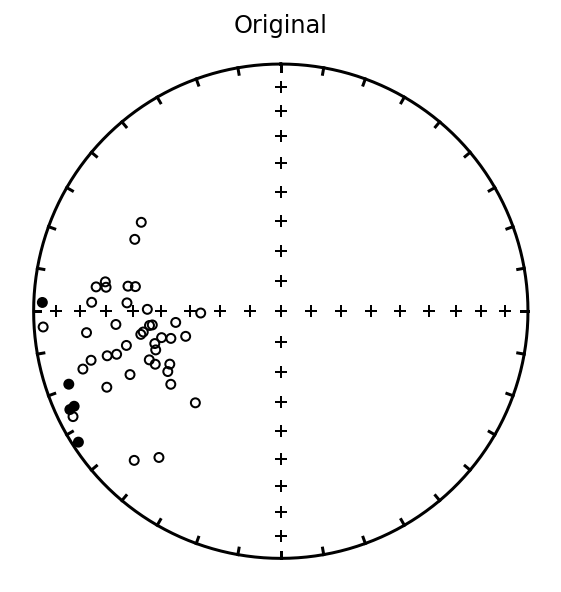

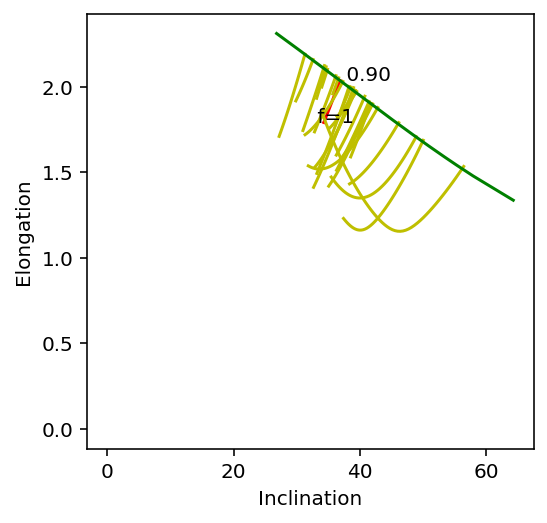

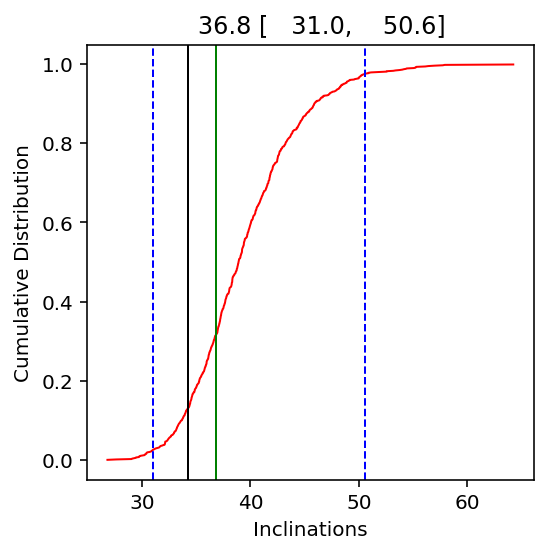

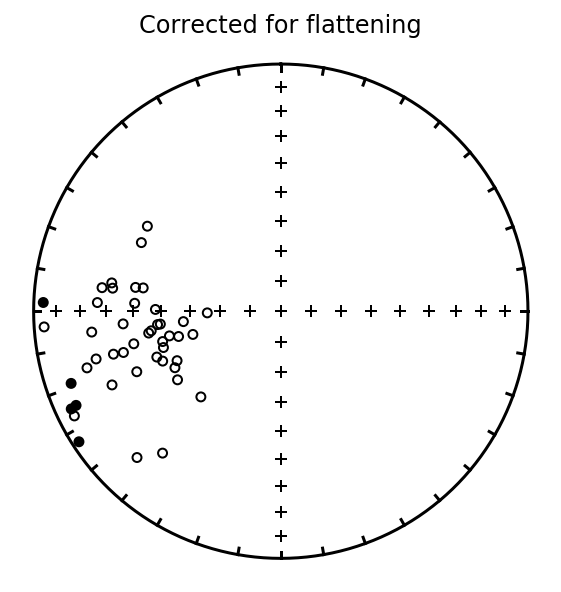

In [87]:
# hdt_tc_di_block = ipmag.make_di_block(SC1_spec_hdt_tc['dir_dec'].tolist(), SC1_spec_hdt_tc['dir_inc'].tolist())
# hdt_tc_ei_corrected = ipmag.find_ei(np.array(hdt_tc_di_block),save=False, return_new_dirs=True)

### unflattening result of Jacobsville directions

- It turns out 0.6 for flattening facter does make the scatter of the directions worse - an increase in A95 value from 6.4 to 7.2
- the E/I method also shows the predicted flattening factor is 0.9... with a wide range of uncertainty

### Combine Jacobsville Keweenaw Peninsula area data

In [57]:
Jacobsville_keweenaw = pd.concat([Dubois1962a_samples_kewee, Roy1978a_sites_A, SC1_spec_hdt_tc])
Jacobsville_keweenaw_mean_pole = ipmag.fisher_mean(Jacobsville_keweenaw['Plon'].tolist(), Jacobsville_keweenaw['Plat'].tolist())

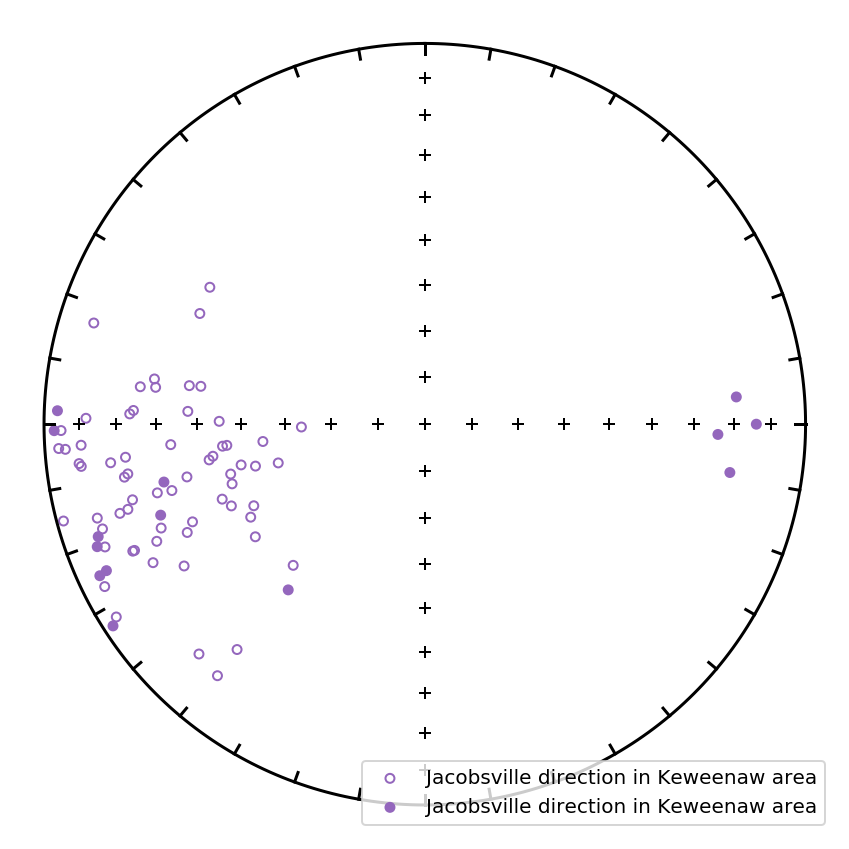

In [56]:
fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(fignum)

ipmag.plot_di(Jacobsville_keweenaw['dir_dec'].tolist(),Jacobsville_keweenaw['dir_inc'].tolist(),color='C4',label='Jacobsville direction in Keweenaw area')

plt.legend(loc=4)
# plt.savefig('../Figures/specimen_directions.pdf')
plt.show()

<Figure size 360x360 with 0 Axes>

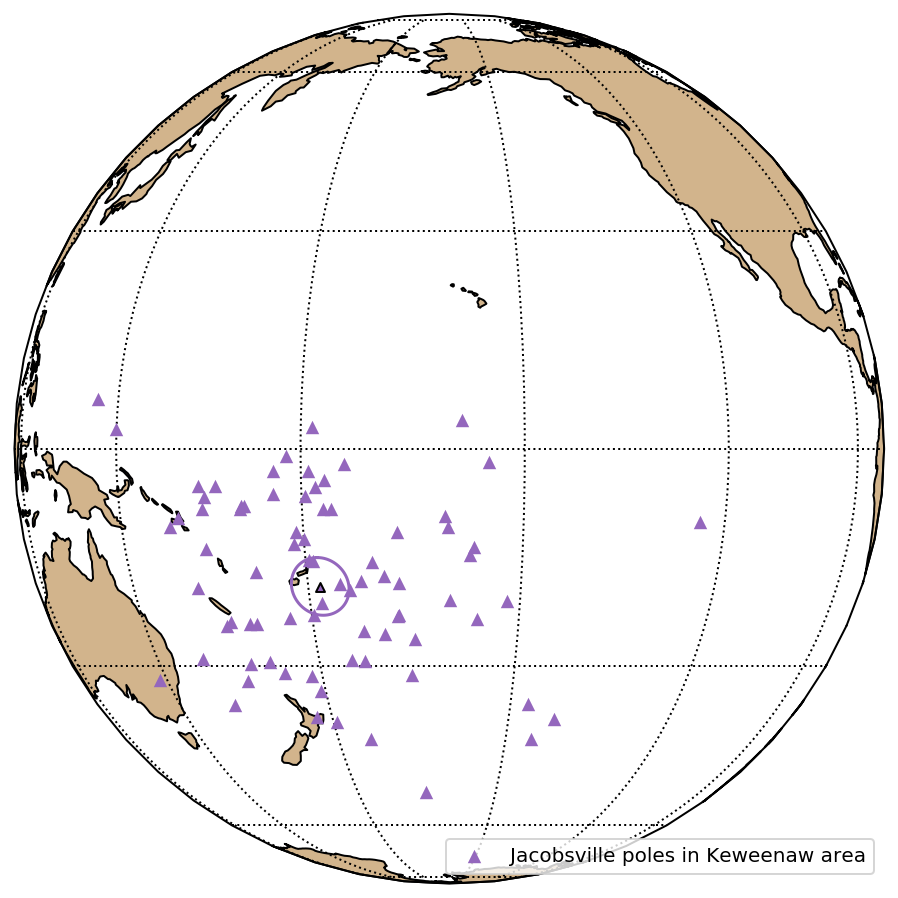

In [59]:
plt.figure(figsize=(5, 5))
map_axis=ipmag.make_orthographic_map(central_longitude=200,central_latitude=0)

ipmag.plot_vgp(map_axis, Jacobsville_keweenaw['Plon'].tolist(), 
               Jacobsville_keweenaw['Plat'].tolist(), markersize = 45, marker = '^', color = 'C4', edge='none', label = 'Jacobsville poles in Keweenaw area')

ipmag.plot_pole(map_axis, Jacobsville_keweenaw_mean_pole['dec'], 
                Jacobsville_keweenaw_mean_pole['inc'], 
                Jacobsville_keweenaw_mean_pole['alpha95'], 
                color = 'C4', marker = '^')

plt.legend(loc=4)
plt.show()

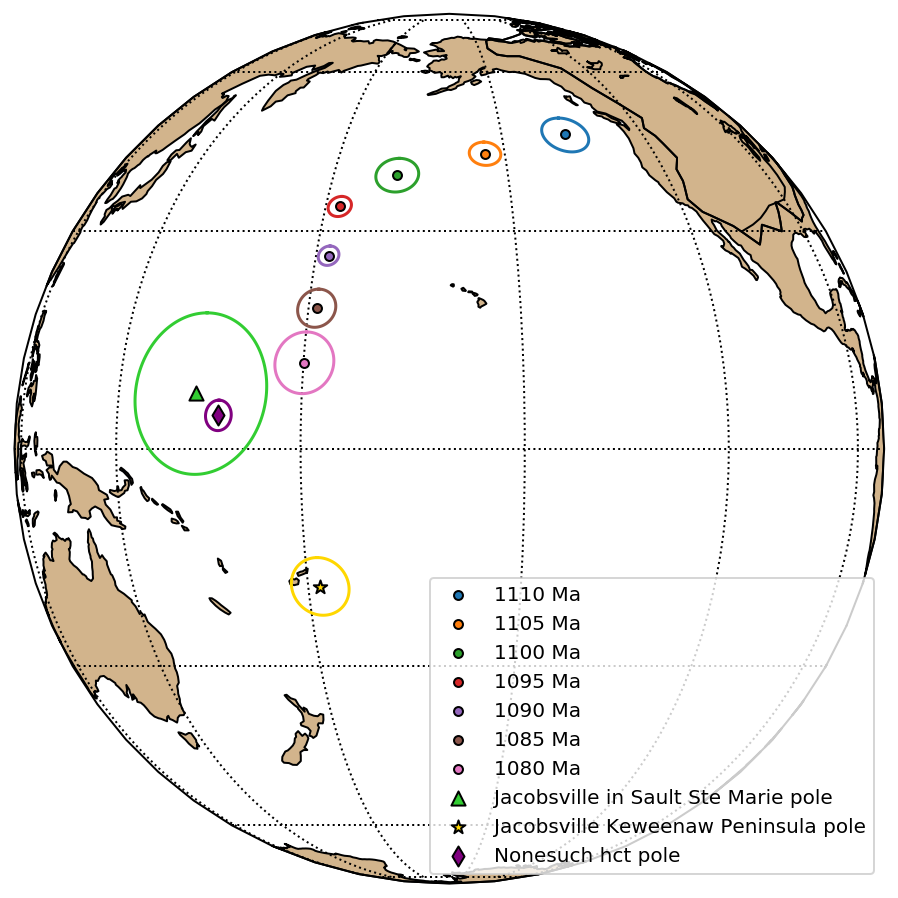

In [95]:
one_Euler_pole_lon = np.loadtxt('../Data/Keweenawan_track/pole_lon_positions_2_true.txt')
one_Euler_pole_lat = np.loadtxt('../Data/Keweenawan_track/pole_lat_positions_2_true.txt')

m = ipmag.make_orthographic_map(central_latitude=0,central_longitude=200)
m.add_feature(Laurentia_outline)
plt.figure(num=1,figsize=(10, 10))

fisher0 = ipmag.fisher_mean(one_Euler_pole_lon[:,0]+180,one_Euler_pole_lat[:,0])
theta0 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,0]+180,one_Euler_pole_lat[:,0])
fisher0['theta'] = theta0
ipmag.plot_pole(m,fisher0['dec'],fisher0['inc'],theta0,color='C0',label='1110 Ma')

fisher1 = ipmag.fisher_mean(one_Euler_pole_lon[:,1]+180,one_Euler_pole_lat[:,1])
theta1 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,1]+180,one_Euler_pole_lat[:,1])
fisher1['theta'] = theta1
ipmag.plot_pole(m,fisher1['dec'],fisher1['inc'],theta1,color='C1',label='1105 Ma')

fisher2 = ipmag.fisher_mean(one_Euler_pole_lon[:,2]+180,one_Euler_pole_lat[:,2])
theta2 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,2]+180,one_Euler_pole_lat[:,2])
fisher2['theta'] = theta2
ipmag.plot_pole(m,fisher2['dec'],fisher2['inc'],theta2,color='C2',label='1100 Ma')

fisher3 = ipmag.fisher_mean(one_Euler_pole_lon[:,3]+180,one_Euler_pole_lat[:,3])
theta3 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,3]+180,one_Euler_pole_lat[:,3])
fisher3['theta'] = theta3
ipmag.plot_pole(m,fisher3['dec'],fisher3['inc'],theta3,color='C3',label='1095 Ma')

fisher4 = ipmag.fisher_mean(one_Euler_pole_lon[:,4]+180,one_Euler_pole_lat[:,4])
theta4 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,4]+180,one_Euler_pole_lat[:,4])
fisher4['theta'] = theta4
ipmag.plot_pole(m,fisher4['dec'],fisher4['inc'],theta4,color='C4',label='1090 Ma')

fisher5 = ipmag.fisher_mean(one_Euler_pole_lon[:,5]+180,one_Euler_pole_lat[:,5])
theta5 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,5]+180,one_Euler_pole_lat[:,5])
fisher5['theta'] = theta5
ipmag.plot_pole(m,fisher5['dec'],fisher5['inc'],theta5,color='C5',label='1085 Ma')

fisher6 = ipmag.fisher_mean(one_Euler_pole_lon[:,6]+180,one_Euler_pole_lat[:,6])
theta6 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,6]+180,one_Euler_pole_lat[:,6])
fisher6['theta'] = theta6
ipmag.plot_pole(m,fisher6['dec'],fisher6['inc'],theta6,color='C6',label='1080 Ma')

ipmag.plot_pole(m, Jacobsville_SSM_mean_pole['dec'], 
                Jacobsville_SSM_mean_pole['inc'], 
                Jacobsville_SSM_mean_pole['alpha95'], 
                color = 'limegreen', marker = '^', markersize = 50,label='Jacobsville in Sault Ste Marie pole')

ipmag.plot_pole(m, Jacobsville_keweenaw_mean_pole['dec'], 
                Jacobsville_keweenaw_mean_pole['inc'], 
                Jacobsville_keweenaw_mean_pole['alpha95'], 
                color = 'gold', marker = '*', markersize = 50,label='Jacobsville Keweenaw Peninsula pole')
ipmag.plot_pole(m, 167.8, 4.4, 2.0, 
                color = 'purple', markersize = 50, marker = 'd', label='Nonesuch hct pole')


plt.legend(loc=4)
plt.show()

## Explore data from this study in context of Halls (2015) Grenville 4000 km shortening model

Halls, H. C. (2015). Paleomagnetic evidence for∼ 4000 km of crustal shortening across the 1 Ga Grenville orogen of North America. Geology, 43(12), 1051-1054.

In [44]:
Halls2015_A = pd.read_csv('../Data/Pmag_compiled/Halls2015_A.csv')
Halls2015_B_C = pd.read_csv('../Data/Pmag_compiled/Halls2015_B_C.csv')
Halls2015_P = pd.read_csv('../Data/Pmag_compiled/Halls2015_P.csv')
Halls2015_poles = pd.read_csv('../Data/Pmag_compiled/Halls2015_pole_compilation.csv')

Halls2015_A = Halls2015_A[Halls2015_A['site'] != 'TG*']
Halls2015_A = ipmag.vgp_calc(Halls2015_A, tilt_correction='no',
    site_lon='longitude',
    site_lat='latitude',
    dec_is='Dec',
    inc_is='Inc',)

Halls2015_B_C = ipmag.vgp_calc(Halls2015_B_C, tilt_correction='no',
    site_lon='lon',
    site_lat='lat',
    dec_is='Dec',
    inc_is='Inc',)

In [70]:
Halls2015_A_whitestone = Halls2015_A[(Halls2015_A['site'] == 'WA') | (Halls2015_A['site'] == 'WD')]

In [106]:
Haliburton_pole = Laurentia_poles[Laurentia_poles['PoleName'] == 'Haliburton Intrusions'].reset_index()

### Group A poles 

In Halls (2015) discussion, according to U-Pb titanite and Ar-Ar hornblende ages from the units south to the Allochthon Boundary thrust (1050 $\pm$ 50; 980 $\pm$ 35 Ma), "The estimate of 1040–1020 Ma for A would place the Laurentian-age equivalent pole approximately halfway between those of P and the Lake Shore Traps.", yet the mean pole position from these units are significantly northerly located than the reversed pole position of the MCR rocks. Also the refined date of the Lake Shore is ca. 1085 Ma. 



In [45]:
Halls2015_A_mean_pole = ipmag.fisher_mean(Halls2015_A['vgp_lon_rev'].tolist(), Halls2015_A['vgp_lat_rev'].tolist())

<Figure size 360x360 with 0 Axes>

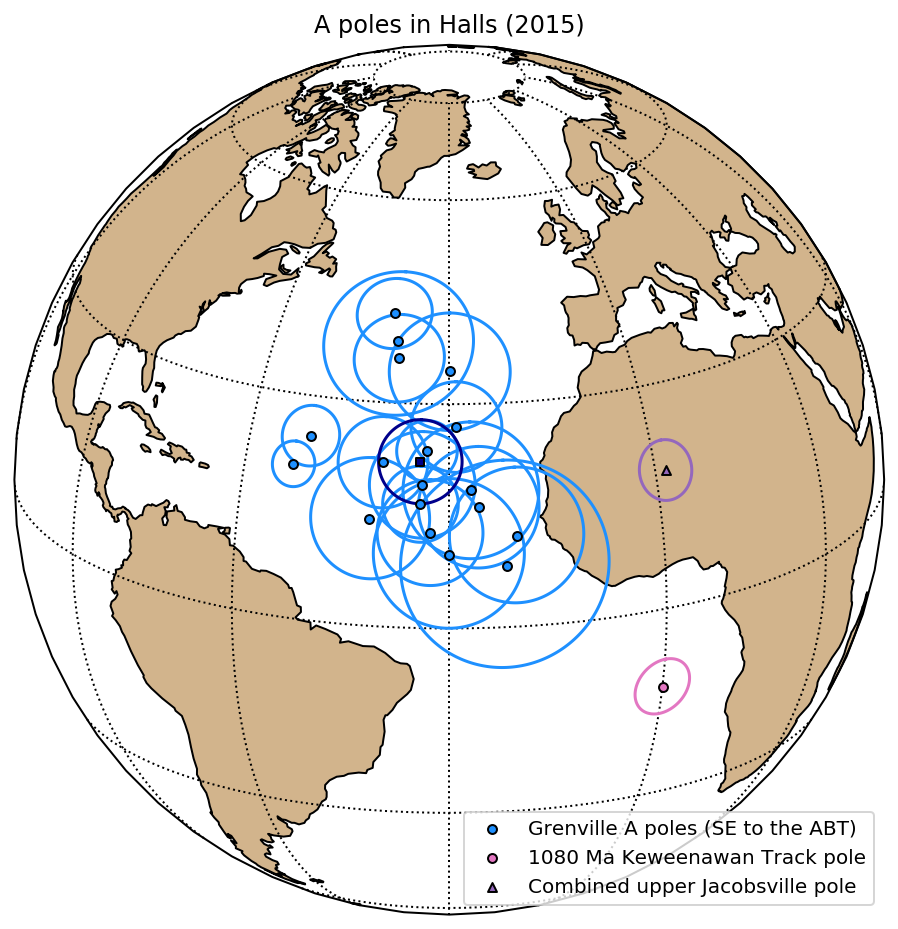

In [63]:
plt.figure(figsize=(5, 5))
map_axis=ipmag.make_orthographic_map(central_longitude=330,central_latitude=20)

ipmag.plot_poles(map_axis, Halls2015_A['vgp_lon_rev'].tolist(), Halls2015_A['vgp_lat_rev'].tolist(), Halls2015_A['a95'].tolist(), 
                color = 'dodgerblue', marker = 'o', label = 'Grenville A poles (SE to the ABT)')
ipmag.plot_pole(map_axis, Halls2015_A_mean_pole['dec'], Halls2015_A_mean_pole['inc'], Halls2015_A_mean_pole['alpha95'], color = 'darkblue', marker = 's')
ipmag.plot_pole(map_axis,180+fisher6['dec'],-fisher6['inc'],theta6,color='C6',label='1080 Ma Keweenawan Track pole')
# ipmag.plot_pole(map_axis, 180+SC1_spec_hdt_tc_mean_pole['dec'], -SC1_spec_hdt_tc_mean_pole['inc'], SC1_spec_hdt_tc_mean_pole['alpha95'], 
#                 color = 'red', marker = 's', label = 'Jacobsville hdt tc poles')
ipmag.plot_pole(map_axis, 180+Jacobsville_keweenaw_mean_pole['dec'], 
                -Jacobsville_keweenaw_mean_pole['inc'], 
                Jacobsville_keweenaw_mean_pole['alpha95'], 
                color = 'C4', marker = '^', label = 'Combined upper Jacobsville pole')

plt.legend(loc=4)
plt.title('A poles in Halls (2015)')
plt.show()

### Jacobsville vs. Whitestone poles

<Figure size 360x360 with 0 Axes>

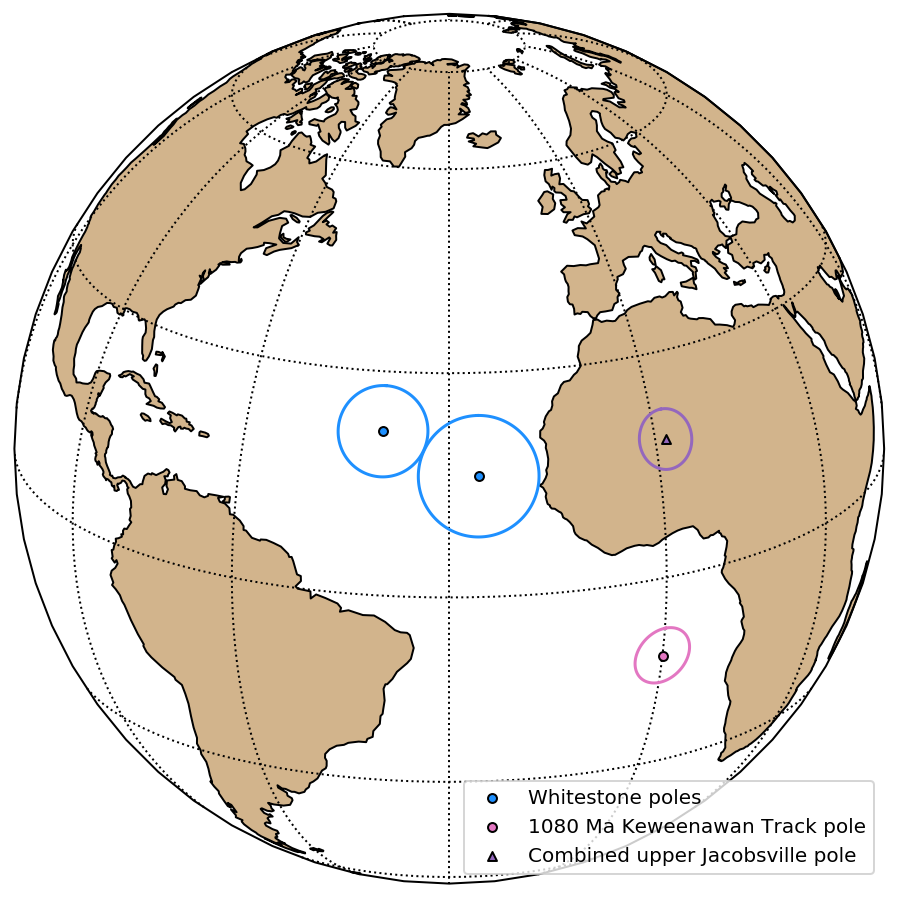

In [107]:
plt.figure(figsize=(5, 5))
map_axis=ipmag.make_orthographic_map(central_longitude=330,central_latitude=20)

ipmag.plot_poles(map_axis, Halls2015_A_whitestone['vgp_lon_rev'].tolist(), Halls2015_A_whitestone['vgp_lat_rev'].tolist(), Halls2015_A_whitestone['a95'].tolist(), 
                color = 'dodgerblue', marker = 'o', label = 'Whitestone poles')
ipmag.plot_pole(map_axis,180+fisher6['dec'],-fisher6['inc'],theta6,color='C6',label='1080 Ma Keweenawan Track pole')
# ipmag.plot_pole(map_axis, 180+SC1_spec_hdt_tc_mean_pole['dec'], -SC1_spec_hdt_tc_mean_pole['inc'], SC1_spec_hdt_tc_mean_pole['alpha95'], 
#                 color = 'red', marker = 's', label = 'Jacobsville hdt tc poles')
ipmag.plot_pole(map_axis, 180+Jacobsville_keweenaw_mean_pole['dec'], 
                -Jacobsville_keweenaw_mean_pole['inc'], 
                Jacobsville_keweenaw_mean_pole['alpha95'], 
                color = 'C4', marker = '^', label = 'Combined upper Jacobsville pole')
plt.legend(loc=4)
# plt.title('A poles in Halls (2015)')
plt.show()

### Jacobsville vs. Haliburton pole

<Figure size 360x360 with 0 Axes>

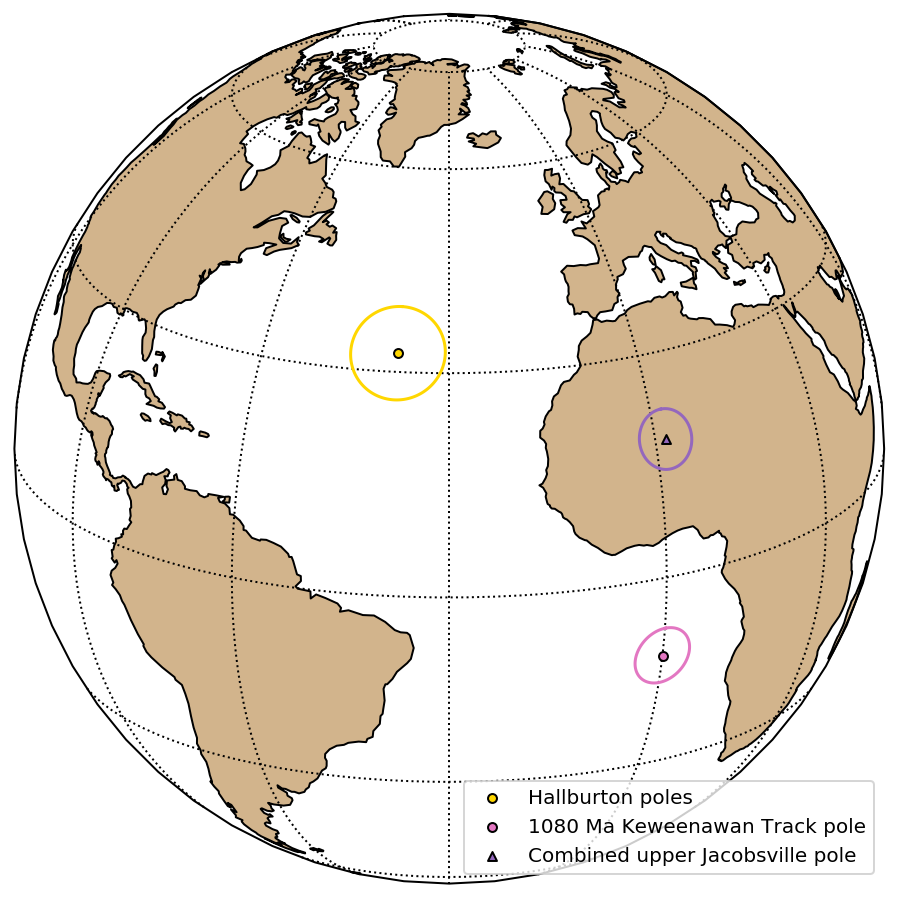

In [109]:
plt.figure(figsize=(5, 5))
map_axis=ipmag.make_orthographic_map(central_longitude=330,central_latitude=20)

ipmag.plot_poles(map_axis, 180+Haliburton_pole['PLon'], -Haliburton_pole['PLat'], Haliburton_pole['A95'], 
                color = 'gold', marker = 'o', label = 'Haliburton poles')
ipmag.plot_pole(map_axis,180+fisher6['dec'],-fisher6['inc'],theta6,color='C6',label='1080 Ma Keweenawan Track pole')
# ipmag.plot_pole(map_axis, 180+SC1_spec_hdt_tc_mean_pole['dec'], -SC1_spec_hdt_tc_mean_pole['inc'], SC1_spec_hdt_tc_mean_pole['alpha95'], 
#                 color = 'red', marker = 's', label = 'Jacobsville hdt tc poles')
ipmag.plot_pole(map_axis, 180+Jacobsville_keweenaw_mean_pole['dec'], 
                -Jacobsville_keweenaw_mean_pole['inc'], 
                Jacobsville_keweenaw_mean_pole['alpha95'], 
                color = 'C4', marker = '^', label = 'Combined upper Jacobsville pole')
plt.legend(loc=4)
# plt.title('A poles in Halls (2015)')
plt.show()

In [80]:
WA_to_Jacobsville_degree=pmag.angle([Halls2015_A_whitestone['vgp_lon_rev'].tolist()[0],Halls2015_A_whitestone['vgp_lat_rev'].tolist()[0]], 
[180+Jacobsville_keweenaw_mean_pole['dec'], -Jacobsville_keweenaw_mean_pole['inc']])

angle_to_distance(WA_to_Jacobsville_degree)

array([2940.3654072016534])

In [84]:
WD_to_Jacobsville_degree=pmag.angle([Halls2015_A_whitestone['vgp_lon_rev'].tolist()[1],Halls2015_A_whitestone['vgp_lat_rev'].tolist()[1]], 
[180+Jacobsville_keweenaw_mean_pole['dec'], -Jacobsville_keweenaw_mean_pole['inc']])

angle_to_distance(WD_to_Jacobsville_degree)

array([4305.954157414103])

In [75]:
Halls2015_A_whitestone['vgp_lon_rev'].tolist()[0],Halls2015_A_whitestone['vgp_lat_rev'].tolist()[0]

(334.07806769908325, 16.29444085339053)

In [77]:
Halls2015_A_whitestone['vgp_lon_rev'].tolist()[1],Halls2015_A_whitestone['vgp_lat_rev'].tolist()[1]

(320.4874301931443, 22.07131956990144)

In [76]:
180+Jacobsville_keweenaw_mean_pole['dec'], -Jacobsville_keweenaw_mean_pole['inc']

(361.7191497197575, 18.50485626238311)

In [47]:
pmag.angle([Halls2015_A_mean_pole['dec'], Halls2015_A_mean_pole['inc']], [180+fisher6['dec'],-fisher6['inc']])

array([47.59406715930394])

In [61]:
Grenville_to_Jacobsville_degree = pmag.angle([Halls2015_A_mean_pole['dec'], Halls2015_A_mean_pole['inc']], 
                                             [180+Jacobsville_keweenaw_mean_pole['dec'], -Jacobsville_keweenaw_mean_pole['inc']])
Grenville_to_Jacobsville_degree

array([33.75123889132656])

In [65]:
angle_to_distance(Grenville_to_Jacobsville_degree)

array([3752.966532684034])

In [62]:
Nonesuch_to_Jacobsville = pmag.angle([180+Jacobsville_keweenaw_mean_pole['dec'], -Jacobsville_keweenaw_mean_pole['inc']],[180+fisher6['dec'],-fisher6['inc']])
Nonesuch_to_Jacobsville

array([29.977139173271357])

In [66]:
angle_to_distance(Nonesuch_to_Jacobsville)

array([3333.305791385637])

In [86]:
angle_to_distance(30)/800

4.169809749170953